In [1]:
# Mixed new and old data

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose
#from keras.utils.vis_utils import plot_model
import keras.backend as K
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.models import load_model
# Set the random seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)



def build_unet(input_shape,input_shape2, seed_value=42):
    
    
    # Create separate input layers for the three inputs
    input_low_geometry = Input(shape=input_shape, name='low_geometry_input')
    input_low_stream = Input(shape=input_shape2, name='low_stream_input')
    input_low_pressure = Input(shape=input_shape2, name='low_pressure_input')

    # Concatenate the three input layers to create a single input
    concatenated_input = concatenate([input_low_geometry, input_low_stream,input_low_pressure], axis=-1)
   

    # Contracting path
    conv1 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(concatenated_input )
    conv1 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv5)

    # Expanding path
    up6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up6, conv4])
    conv6 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv6)

    up7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3])
    conv7 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv7)

    up8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2])
    conv8 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv8)

    up9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1])
    conv9 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv9)
    
    
    
    
    conv10 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv9 )
    conv10 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv10)
    pool10 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv20 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool10)
    conv20 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv20)
    pool20 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv30 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool20)
    conv30 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv30)
    pool30 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv40 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool30)
    conv40 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv40)
    pool40 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv50 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool40)
    conv50 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv50)

    # Expanding path
    up60 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up60 = concatenate([up60, conv40])
    conv60 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up60)
    conv60 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv60)

    up70 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up70 = concatenate([up70, conv30])
    conv70 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up70)
    conv70 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv70)

    up80 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up80 = concatenate([up80, conv20])
    conv80 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up80)
    conv80 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv80)

    up90 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up90 = concatenate([up90, conv10])
    conv90 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up90)
    conv90 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv90)    
    
    
    
    conv100 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv90 )
    conv100 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv100)
    pool100 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv200 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool100)
    conv200 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv200)
    pool200 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv300 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool200)
    conv300 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv300)
    pool300 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv400 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool300)
    conv400 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv400)
    pool400 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv500 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool400)
    conv500 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv500)

    # Expanding path
    up600 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up600 = concatenate([up600, conv400])
    conv600 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up600)
    conv600 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv600)

    up700 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up700 = concatenate([up700, conv300])
    conv700 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up700)
    conv700 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv700)

    up800 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up800 = concatenate([up800, conv200])
    conv800 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up800)
    conv800 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv800)

    up900 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up900 = concatenate([up900, conv100])
    up900 = concatenate([up900, conv90])
    up900 = concatenate([up900, conv9])
    conv900 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up900)
    conv900 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv900)
    conv900 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv900)
    
    # Velocity output layer
    velocity_outputs = Conv2D(1, 1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), name='velocity_output')(conv900)

    # Pressure output layer
    pressure_outputs = Conv2D(1, 1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), name='pressure_output')(conv900)

    model = Model(inputs=[input_low_geometry,input_low_stream,input_low_pressure], outputs=[pressure_outputs, velocity_outputs])
    return model

def boundary_loss(y_true, y_pred):
    # Extract velocity and pressure from predictions and true values
    velocity_pred = y_pred[0]
    pressure_pred = y_pred[1]
    velocity_true = y_true[0]
    pressure_true = y_true[1]
    
    # Compute max and min values for velocity and pressure
    velocity_pred_max = tf.reduce_max(velocity_pred)
    velocity_pred_min = tf.reduce_min(velocity_pred)
    velocity_true_max = tf.reduce_max(velocity_true)
    velocity_true_min = tf.reduce_min(velocity_true)
    
    pressure_pred_max = tf.reduce_max(pressure_pred)
    pressure_pred_min = tf.reduce_min(pressure_pred)
    pressure_true_max = tf.reduce_max(pressure_true)
    pressure_true_min = tf.reduce_min(pressure_true)
    
    # Compute residuals for max and min values
    velocity_residual = tf.square(velocity_pred_max - velocity_true_max) + tf.square(velocity_pred_min - velocity_true_min)
    pressure_residual = tf.square(pressure_pred_max - pressure_true_max) + tf.square(pressure_pred_min - pressure_true_min)
    
    # Total loss as the sum of residuals
    tloss = (velocity_residual + pressure_residual)/2
    
    return tloss







def physical_loss(y_true, y_pred):
    
    # Extract velocity and pressure from predictions and true values
    velocity_pred = y_pred[0]
    pressure_pred = y_pred[1]
    velocity_true = y_true[0]
    pressure_true = y_true[1]
    
    
    # Convert the numpy array to a TensorFlow tensor
    velocity_true = tf.convert_to_tensor(velocity_true, dtype=tf.float32)
    pressure_true = tf.convert_to_tensor(pressure_true, dtype=tf.float32)
    
    
    
    velocity_true = tf.expand_dims(velocity_true, axis=-1)
    pressure_true = tf.expand_dims(pressure_true, axis=-1)
    
    velocity_true = tf.expand_dims(velocity_true, axis=0)
    pressure_true = tf.expand_dims(pressure_true, axis=0)
    
    
    velocity_pred = tf.expand_dims(velocity_pred, axis=-1)
    pressure_pred = tf.expand_dims(pressure_pred, axis=-1)

    velocity_pred = tf.expand_dims(velocity_pred, axis=0)
    pressure_pred = tf.expand_dims(pressure_pred, axis=0)

    

    # Compute gradients
    velocity_gradients_pred = tf.image.image_gradients(velocity_pred)
    pressure_gradients_pred = tf.image.image_gradients(pressure_pred)
    velocity_gradients_true = tf.image.image_gradients(velocity_true)
    pressure_gradients_true = tf.image.image_gradients(pressure_true)

    # Compute divergence of velocity (for continuity equation)
    divergence_velocity_pred = velocity_gradients_pred[0] + velocity_gradients_pred[1]
    divergence_velocity_true = velocity_gradients_true[0] + velocity_gradients_true[1]
    
    divergence_pressure_pred = pressure_gradients_pred[0]+ pressure_gradients_pred[1]
    divergence_pressure_true = pressure_gradients_true[0] + pressure_gradients_true[1]


    # Compute the convective term (u · ∇)u for predicted and true velocity
    convective_term_pred = (
        velocity_pred[0] * velocity_gradients_pred[0] + 
        velocity_pred[0] * velocity_gradients_pred[1]
    )
    convective_term_true = (
        velocity_true[0] * velocity_gradients_true[0] + 
        velocity_true[0] * velocity_gradients_true[1]
    )

    # Compute the viscous term μ∇²u (Laplacian of velocity) for predicted and true velocity
    viscous_term_pred =  (
        tf.image.image_gradients(velocity_gradients_pred[0]) + 
        tf.image.image_gradients(velocity_gradients_pred[1])
    )
    viscous_term_true =  (
        tf.image.image_gradients(velocity_gradients_true[0]) + 
        tf.image.image_gradients(velocity_gradients_true[1])
    )

    # Compute the pressure gradient term ∇p for predicted and true pressure
    pressure_gradient_pred = tf.concat(pressure_gradients_pred, axis=-1)
    pressure_gradient_true = tf.concat(pressure_gradients_true, axis=-1)

    # Compute the momentum residual for predicted and true values
    momentum_residual_pred = (
        convective_term_pred - 
        pressure_gradient_pred + 
        viscous_term_pred
    )
    momentum_residual_true = (
        convective_term_true - 
        pressure_gradient_true + 
        viscous_term_true
    )
    
    
    
    

    # Compute the L2 norm of the momentum residual
    momentum_residual_norm = tf.reduce_mean(tf.square(momentum_residual_pred - momentum_residual_true))

    # Compute the L2 norm of the continuity residual
    continuity_residual_norm = tf.reduce_mean(tf.square(divergence_velocity_pred - divergence_velocity_true))

    # Total physical loss is the sum of momentum and continuity residuals
    physical_loss_value = 0.2*momentum_residual_norm +continuity_residual_norm

    return physical_loss_value

    
    



def total_loss(y_true, y_pred):
    # You can customize the weighting of the boundary loss and physical loss here
    weight_boundary_loss = 0.001
    weight_physical_loss = 0.999
    phy=physical_loss(y_true, y_pred)

    # Calculate the total loss as a combination of Boundary loss and physical loss
    total_loss = (weight_boundary_loss * boundary_loss(y_true, y_pred) )+(weight_physical_loss * phy )
    return total_loss     






# Train the model with your dataset
import os
import numpy as np
from PIL import Image
from keras.callbacks import ModelCheckpoint



lv_folder = 'Low/LVV-new'
hv_folder = 'High/HVV'
lp_folder = 'Low/LPP-new'
hp_folder = 'High/HPP'
lg_folder = 'LG-3C'

# Get the list of file names in each folder
lv_files = [f for f in os.listdir(lv_folder) if f != ".ipynb_checkpoints"]
hv_files = [f for f in os.listdir(hv_folder) if f != ".ipynb_checkpoints"]
lp_files = [f for f in os.listdir(lp_folder) if f != ".ipynb_checkpoints"]
hp_files = [f for f in os.listdir(hp_folder) if f != ".ipynb_checkpoints"]
lg_files = [f for f in os.listdir(lg_folder) if f != ".ipynb_checkpoints"]

# Sort the file names to ensure the order is consistent
lv_files.sort()
hv_files.sort()
lp_files.sort()
hp_files.sort()
lg_files.sort()


# Set the input shape
input_shape = (256, 256, 3)  # Update to 3 channels for color images
input_shape2 = (256, 256, 1)

# Create empty lists to store the data
X_lv = []
X_lp = []
X_lg = []
Y_hv = []
Y_hp = []

# Read the data from the folders
for lv_file, hv_file,lp_file,hp_file,lg_file in zip(lv_files, hv_files,lp_files,hp_files,lg_files):
    try:
        
        # Read the LFV
        lv_image = np.load(os.path.join(lv_folder, lv_file))  # Convert to RGB
        X_lv.append(np.array(lv_image))
        
        # Read the HFV
        hv_image = np.load(os.path.join(hv_folder, hv_file))  # Convert to RGB
        Y_hv.append(np.array(hv_image))

        # Read the LFP
        lp_image = np.load(os.path.join(lp_folder, lp_file))  # Convert to RGB
        X_lp.append(np.array(lp_image))
    
    
        # Read the channel geometry image
        lg_image = Image.open(os.path.join(lg_folder, lg_file)).convert('RGB')  # Convert to RGB
        lg_image = lg_image.resize(input_shape[:2])  # Resize the image
        X_lg.append(np.array(lg_image))
    
        # Read the HFP
        hp_image = np.load(os.path.join(hp_folder, hp_file))  # Convert to RGB
        Y_hp.append(np.array(hp_image))
    except:
        print('')

        
        
# Convert the lists to arrays
X_lv = np.array(X_lv) 
X_lp = np.array(X_lp) 
X_lg = np.array(X_lg) / 255.0  # Normalize the channel geometry images
Y_hv = np.array(Y_hv)
Y_hp = np.array(Y_hp)




X_lp[np.isnan(X_lp)] = 0
X_lv[np.isnan(X_lv)] = 0
Y_hp[np.isnan(Y_hp)] = 0
Y_hv[np.isnan(Y_hv)] = 0

Y_hpt=(Y_hp-np.min(Y_hp))/(np.max(Y_hp)-np.min(Y_hp))
X_lpt=(X_lp-np.min(X_lp))/(np.max(X_lp)-np.min(X_lp))




# Build the U-Net model
model = build_unet(input_shape,input_shape2)



optim = Adam(learning_rate=0.00001)
# Compile the model with the desired loss functions
model.compile(optimizer=optim,
              loss=[total_loss,total_loss])
# Set up checkpoints to save the best model during training
checkpoint_path = 'Saved_Models_Temp/Final-micro-proposed-Unet-3-Inputs.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Train the model
epochs = 2400
batch_size = 16
print('start fitting')
model.fit([X_lg,X_lv,X_lpt], [Y_hpt, Y_hv],
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[checkpoint])


2025-03-19 13:21:18.228011: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-03-19 13:21:18.228033: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2025-03-19 13:21:18.228040: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2025-03-19 13:21:18.228070: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-19 13:21:18.228082: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


start fitting
Epoch 1/2400


2025-03-19 13:21:21.923734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


142/142 [==============================] - ETA: 0s - loss: 0.0011 - pressure_output_loss: 4.7614e-04 - velocity_output_loss: 6.0629e-04

2025-03-19 13:23:32.288200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.00064, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5


/Users/trina-mrd-lab2/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


142/142 [==============================] - 141s 984ms/step - loss: 0.0011 - pressure_output_loss: 4.7614e-04 - velocity_output_loss: 6.0629e-04 - val_loss: 6.4464e-04 - val_pressure_output_loss: 2.4546e-04 - val_velocity_output_loss: 3.9918e-04
Epoch 2/2400
142/142 [==============================] - ETA: 0s - loss: 8.7166e-04 - pressure_output_loss: 3.8362e-04 - velocity_output_loss: 4.8804e-04
Epoch 2: val_loss improved from 0.00064 to 0.00055, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 139s 976ms/step - loss: 8.7166e-04 - pressure_output_loss: 3.8362e-04 - velocity_output_loss: 4.8804e-04 - val_loss: 5.4965e-04 - val_pressure_output_loss: 2.2679e-04 - val_velocity_output_loss: 3.2286e-04
Epoch 3/2400
142/142 [==============================] - ETA: 0s - loss: 7.0221e-04 - pressure_output_loss: 3.1593e-04 - velocity_output_loss: 3.8627e-04
Epoch 3: val_loss improved from 0.00055 to 0.00043, saving model to Saved_Models/

Epoch 18/2400
142/142 [==============================] - ETA: 0s - loss: 3.9274e-04 - pressure_output_loss: 1.1166e-04 - velocity_output_loss: 2.8107e-04
Epoch 18: val_loss improved from 0.00016 to 0.00013, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 155s 1s/step - loss: 3.9274e-04 - pressure_output_loss: 1.1166e-04 - velocity_output_loss: 2.8107e-04 - val_loss: 1.3146e-04 - val_pressure_output_loss: 4.9185e-05 - val_velocity_output_loss: 8.2271e-05
Epoch 19/2400
142/142 [==============================] - ETA: 0s - loss: 3.8135e-04 - pressure_output_loss: 1.0388e-04 - velocity_output_loss: 2.7747e-04
Epoch 19: val_loss improved from 0.00013 to 0.00012, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 156s 1s/step - loss: 3.8135e-04 - pressure_output_loss: 1.0388e-04 - velocity_output_loss: 2.7747e-04 - val_loss: 1.2392e-04 - val_pressure_output_loss: 4.7287e-05

Epoch 35/2400
142/142 [==============================] - ETA: 0s - loss: 3.4669e-04 - pressure_output_loss: 5.1719e-05 - velocity_output_loss: 2.9497e-04
Epoch 35: val_loss improved from 0.00009 to 0.00009, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 154s 1s/step - loss: 3.4669e-04 - pressure_output_loss: 5.1719e-05 - velocity_output_loss: 2.9497e-04 - val_loss: 8.6839e-05 - val_pressure_output_loss: 2.9056e-05 - val_velocity_output_loss: 5.7782e-05
Epoch 36/2400
142/142 [==============================] - ETA: 0s - loss: 3.6878e-04 - pressure_output_loss: 5.6673e-05 - velocity_output_loss: 3.1211e-04
Epoch 36: val_loss improved from 0.00009 to 0.00009, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 153s 1s/step - loss: 3.6878e-04 - pressure_output_loss: 5.6673e-05 - velocity_output_loss: 3.1211e-04 - val_loss: 8.6252e-05 - val_pressure_output_loss: 2.7432e-05

Epoch 53/2400
142/142 [==============================] - ETA: 0s - loss: 3.0242e-04 - pressure_output_loss: 3.3294e-05 - velocity_output_loss: 2.6913e-04
Epoch 53: val_loss improved from 0.00008 to 0.00008, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 153s 1s/step - loss: 3.0242e-04 - pressure_output_loss: 3.3294e-05 - velocity_output_loss: 2.6913e-04 - val_loss: 8.1326e-05 - val_pressure_output_loss: 2.2968e-05 - val_velocity_output_loss: 5.8357e-05
Epoch 54/2400
142/142 [==============================] - ETA: 0s - loss: 3.3909e-04 - pressure_output_loss: 4.1486e-05 - velocity_output_loss: 2.9761e-04
Epoch 54: val_loss did not improve from 0.00008
142/142 [==============================] - 154s 1s/step - loss: 3.3909e-04 - pressure_output_loss: 4.1486e-05 - velocity_output_loss: 2.9761e-04 - val_loss: 8.1551e-05 - val_pressure_output_loss: 2.2337e-05 - val_velocity_output_loss: 5.9214e-05
Epoch 55/2400
142/142 [=========

Epoch 71/2400
142/142 [==============================] - ETA: 0s - loss: 2.9027e-04 - pressure_output_loss: 3.6061e-05 - velocity_output_loss: 2.5421e-04
Epoch 71: val_loss did not improve from 0.00008
142/142 [==============================] - 157s 1s/step - loss: 2.9027e-04 - pressure_output_loss: 3.6061e-05 - velocity_output_loss: 2.5421e-04 - val_loss: 7.9234e-05 - val_pressure_output_loss: 2.1474e-05 - val_velocity_output_loss: 5.7759e-05
Epoch 72/2400
142/142 [==============================] - ETA: 0s - loss: 3.2297e-04 - pressure_output_loss: 3.4867e-05 - velocity_output_loss: 2.8810e-04
Epoch 72: val_loss did not improve from 0.00008
142/142 [==============================] - 157s 1s/step - loss: 3.2297e-04 - pressure_output_loss: 3.4867e-05 - velocity_output_loss: 2.8810e-04 - val_loss: 7.6922e-05 - val_pressure_output_loss: 1.8861e-05 - val_velocity_output_loss: 5.8061e-05
Epoch 73/2400
142/142 [==============================] - ETA: 0s - loss: 3.1337e-04 - pressure_output_lo

Epoch 89/2400
142/142 [==============================] - ETA: 0s - loss: 2.9709e-04 - pressure_output_loss: 3.3373e-05 - velocity_output_loss: 2.6372e-04
Epoch 89: val_loss did not improve from 0.00007
142/142 [==============================] - 155s 1s/step - loss: 2.9709e-04 - pressure_output_loss: 3.3373e-05 - velocity_output_loss: 2.6372e-04 - val_loss: 7.2568e-05 - val_pressure_output_loss: 1.4895e-05 - val_velocity_output_loss: 5.7673e-05
Epoch 90/2400
142/142 [==============================] - ETA: 0s - loss: 5.5090e-04 - pressure_output_loss: 2.4900e-04 - velocity_output_loss: 3.0190e-04
Epoch 90: val_loss did not improve from 0.00007
142/142 [==============================] - 157s 1s/step - loss: 5.5090e-04 - pressure_output_loss: 2.4900e-04 - velocity_output_loss: 3.0190e-04 - val_loss: 7.5501e-05 - val_pressure_output_loss: 1.7851e-05 - val_velocity_output_loss: 5.7650e-05
Epoch 91/2400
142/142 [==============================] - ETA: 0s - loss: 3.1666e-04 - pressure_output_lo

Epoch 123/2400
142/142 [==============================] - ETA: 0s - loss: 2.8529e-04 - pressure_output_loss: 4.2786e-05 - velocity_output_loss: 2.4250e-04
Epoch 123: val_loss did not improve from 0.00005
142/142 [==============================] - 153s 1s/step - loss: 2.8529e-04 - pressure_output_loss: 4.2786e-05 - velocity_output_loss: 2.4250e-04 - val_loss: 5.0613e-05 - val_pressure_output_loss: 1.0075e-05 - val_velocity_output_loss: 4.0538e-05
Epoch 124/2400
142/142 [==============================] - ETA: 0s - loss: 2.9449e-04 - pressure_output_loss: 3.1053e-05 - velocity_output_loss: 2.6343e-04
Epoch 124: val_loss improved from 0.00005 to 0.00005, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 153s 1s/step - loss: 2.9449e-04 - pressure_output_loss: 3.1053e-05 - velocity_output_loss: 2.6343e-04 - val_loss: 4.9059e-05 - val_pressure_output_loss: 9.8859e-06 - val_velocity_output_loss: 3.9174e-05
Epoch 125/2400
142/142 [====

Epoch 158/2400
142/142 [==============================] - ETA: 0s - loss: 2.7856e-04 - pressure_output_loss: 4.6414e-05 - velocity_output_loss: 2.3214e-04
Epoch 158: val_loss did not improve from 0.00004
142/142 [==============================] - 153s 1s/step - loss: 2.7856e-04 - pressure_output_loss: 4.6414e-05 - velocity_output_loss: 2.3214e-04 - val_loss: 4.5324e-05 - val_pressure_output_loss: 8.1528e-06 - val_velocity_output_loss: 3.7171e-05
Epoch 159/2400
142/142 [==============================] - ETA: 0s - loss: 2.7670e-04 - pressure_output_loss: 2.9586e-05 - velocity_output_loss: 2.4711e-04
Epoch 159: val_loss did not improve from 0.00004
142/142 [==============================] - 153s 1s/step - loss: 2.7670e-04 - pressure_output_loss: 2.9586e-05 - velocity_output_loss: 2.4711e-04 - val_loss: 4.6387e-05 - val_pressure_output_loss: 8.6779e-06 - val_velocity_output_loss: 3.7709e-05
Epoch 160/2400
142/142 [==============================] - ETA: 0s - loss: 2.3612e-04 - pressure_outp

142/142 [==============================] - 152s 1s/step - loss: 2.2545e-04 - pressure_output_loss: 2.1742e-05 - velocity_output_loss: 2.0371e-04 - val_loss: 4.3297e-05 - val_pressure_output_loss: 7.6159e-06 - val_velocity_output_loss: 3.5681e-05
Epoch 176/2400
142/142 [==============================] - ETA: 0s - loss: 2.4896e-04 - pressure_output_loss: 2.1296e-05 - velocity_output_loss: 2.2767e-04
Epoch 176: val_loss improved from 0.00004 to 0.00004, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 152s 1s/step - loss: 2.4896e-04 - pressure_output_loss: 2.1296e-05 - velocity_output_loss: 2.2767e-04 - val_loss: 4.2974e-05 - val_pressure_output_loss: 7.1507e-06 - val_velocity_output_loss: 3.5823e-05
Epoch 177/2400
142/142 [==============================] - ETA: 0s - loss: 2.3667e-04 - pressure_output_loss: 2.9119e-05 - velocity_output_loss: 2.0755e-04
Epoch 177: val_loss did not improve from 0.00004
142/142 [===================

Epoch 193/2400
142/142 [==============================] - ETA: 0s - loss: 2.3710e-04 - pressure_output_loss: 3.5890e-05 - velocity_output_loss: 2.0121e-04
Epoch 193: val_loss did not improve from 0.00004
142/142 [==============================] - 150s 1s/step - loss: 2.3710e-04 - pressure_output_loss: 3.5890e-05 - velocity_output_loss: 2.0121e-04 - val_loss: 4.0434e-05 - val_pressure_output_loss: 6.3961e-06 - val_velocity_output_loss: 3.4038e-05
Epoch 194/2400
142/142 [==============================] - ETA: 0s - loss: 2.3018e-04 - pressure_output_loss: 2.3505e-05 - velocity_output_loss: 2.0668e-04
Epoch 194: val_loss did not improve from 0.00004
142/142 [==============================] - 151s 1s/step - loss: 2.3018e-04 - pressure_output_loss: 2.3505e-05 - velocity_output_loss: 2.0668e-04 - val_loss: 4.1538e-05 - val_pressure_output_loss: 6.8885e-06 - val_velocity_output_loss: 3.4650e-05
Epoch 195/2400
142/142 [==============================] - ETA: 0s - loss: 2.5553e-04 - pressure_outp

Epoch 211/2400
142/142 [==============================] - ETA: 0s - loss: 2.3969e-04 - pressure_output_loss: 2.4223e-05 - velocity_output_loss: 2.1546e-04
Epoch 211: val_loss improved from 0.00004 to 0.00004, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 150s 1s/step - loss: 2.3969e-04 - pressure_output_loss: 2.4223e-05 - velocity_output_loss: 2.1546e-04 - val_loss: 3.8789e-05 - val_pressure_output_loss: 6.6401e-06 - val_velocity_output_loss: 3.2149e-05
Epoch 212/2400
142/142 [==============================] - ETA: 0s - loss: 2.2849e-04 - pressure_output_loss: 2.4436e-05 - velocity_output_loss: 2.0405e-04
Epoch 212: val_loss did not improve from 0.00004
142/142 [==============================] - 150s 1s/step - loss: 2.2849e-04 - pressure_output_loss: 2.4436e-05 - velocity_output_loss: 2.0405e-04 - val_loss: 3.9113e-05 - val_pressure_output_loss: 6.5188e-06 - val_velocity_output_loss: 3.2594e-05
Epoch 213/2400
142/142 [====

142/142 [==============================] - 150s 1s/step - loss: 2.2127e-04 - pressure_output_loss: 3.0353e-05 - velocity_output_loss: 1.9092e-04 - val_loss: 3.7153e-05 - val_pressure_output_loss: 6.8430e-06 - val_velocity_output_loss: 3.0310e-05
Epoch 229/2400
142/142 [==============================] - ETA: 0s - loss: 4.1381e-04 - pressure_output_loss: 2.1137e-04 - velocity_output_loss: 2.0244e-04
Epoch 229: val_loss did not improve from 0.00004
142/142 [==============================] - 150s 1s/step - loss: 4.1381e-04 - pressure_output_loss: 2.1137e-04 - velocity_output_loss: 2.0244e-04 - val_loss: 3.9242e-05 - val_pressure_output_loss: 8.6784e-06 - val_velocity_output_loss: 3.0564e-05
Epoch 230/2400
142/142 [==============================] - ETA: 0s - loss: 2.0608e-04 - pressure_output_loss: 2.4875e-05 - velocity_output_loss: 1.8120e-04
Epoch 230: val_loss did not improve from 0.00004
142/142 [==============================] - 151s 1s/step - loss: 2.0608e-04 - pressure_output_loss: 2

142/142 [==============================] - ETA: 0s - loss: 2.2312e-04 - pressure_output_loss: 5.5968e-05 - velocity_output_loss: 1.6715e-04
Epoch 246: val_loss did not improve from 0.00003
142/142 [==============================] - 149s 1s/step - loss: 2.2312e-04 - pressure_output_loss: 5.5968e-05 - velocity_output_loss: 1.6715e-04 - val_loss: 3.3946e-05 - val_pressure_output_loss: 6.3238e-06 - val_velocity_output_loss: 2.7622e-05
Epoch 247/2400
142/142 [==============================] - ETA: 0s - loss: 2.2954e-04 - pressure_output_loss: 5.8088e-05 - velocity_output_loss: 1.7145e-04
Epoch 247: val_loss improved from 0.00003 to 0.00003, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 149s 1s/step - loss: 2.2954e-04 - pressure_output_loss: 5.8088e-05 - velocity_output_loss: 1.7145e-04 - val_loss: 3.2922e-05 - val_pressure_output_loss: 5.9782e-06 - val_velocity_output_loss: 2.6944e-05
Epoch 248/2400
142/142 [===================

142/142 [==============================] - ETA: 0s - loss: 1.6828e-04 - pressure_output_loss: 2.3316e-05 - velocity_output_loss: 1.4497e-04
Epoch 280: val_loss did not improve from 0.00003
142/142 [==============================] - 150s 1s/step - loss: 1.6828e-04 - pressure_output_loss: 2.3316e-05 - velocity_output_loss: 1.4497e-04 - val_loss: 3.1100e-05 - val_pressure_output_loss: 5.7228e-06 - val_velocity_output_loss: 2.5377e-05
Epoch 281/2400
142/142 [==============================] - ETA: 0s - loss: 1.5884e-04 - pressure_output_loss: 2.1084e-05 - velocity_output_loss: 1.3776e-04
Epoch 281: val_loss improved from 0.00003 to 0.00003, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 149s 1s/step - loss: 1.5884e-04 - pressure_output_loss: 2.1084e-05 - velocity_output_loss: 1.3776e-04 - val_loss: 2.8068e-05 - val_pressure_output_loss: 5.5300e-06 - val_velocity_output_loss: 2.2538e-05
Epoch 282/2400
142/142 [===================

142/142 [==============================] - 154s 1s/step - loss: 1.8591e-04 - pressure_output_loss: 5.4394e-05 - velocity_output_loss: 1.3152e-04 - val_loss: 3.1497e-05 - val_pressure_output_loss: 7.0917e-06 - val_velocity_output_loss: 2.4405e-05
Epoch 298/2400
142/142 [==============================] - ETA: 0s - loss: 1.6502e-04 - pressure_output_loss: 2.1174e-05 - velocity_output_loss: 1.4385e-04
Epoch 298: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 1.6502e-04 - pressure_output_loss: 2.1174e-05 - velocity_output_loss: 1.4385e-04 - val_loss: 2.6902e-05 - val_pressure_output_loss: 5.3507e-06 - val_velocity_output_loss: 2.1551e-05
Epoch 299/2400
142/142 [==============================] - ETA: 0s - loss: 1.4813e-04 - pressure_output_loss: 2.3755e-05 - velocity_output_loss: 1.2437e-04
Epoch 299: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 1.4813e-04 - pressure_output_loss: 2

Epoch 315/2400
142/142 [==============================] - ETA: 0s - loss: 1.5972e-04 - pressure_output_loss: 2.6506e-05 - velocity_output_loss: 1.3321e-04
Epoch 315: val_loss improved from 0.00002 to 0.00002, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 149s 1s/step - loss: 1.5972e-04 - pressure_output_loss: 2.6506e-05 - velocity_output_loss: 1.3321e-04 - val_loss: 2.3426e-05 - val_pressure_output_loss: 4.9051e-06 - val_velocity_output_loss: 1.8521e-05
Epoch 316/2400
142/142 [==============================] - ETA: 0s - loss: 1.3884e-04 - pressure_output_loss: 2.1804e-05 - velocity_output_loss: 1.1704e-04
Epoch 316: val_loss did not improve from 0.00002
142/142 [==============================] - 148s 1s/step - loss: 1.3884e-04 - pressure_output_loss: 2.1804e-05 - velocity_output_loss: 1.1704e-04 - val_loss: 2.3970e-05 - val_pressure_output_loss: 4.9874e-06 - val_velocity_output_loss: 1.8982e-05
Epoch 317/2400
142/142 [====

142/142 [==============================] - 149s 1s/step - loss: 1.3256e-04 - pressure_output_loss: 2.0493e-05 - velocity_output_loss: 1.1206e-04 - val_loss: 2.2268e-05 - val_pressure_output_loss: 4.9859e-06 - val_velocity_output_loss: 1.7282e-05
Epoch 333/2400
142/142 [==============================] - ETA: 0s - loss: 1.4365e-04 - pressure_output_loss: 2.4599e-05 - velocity_output_loss: 1.1905e-04
Epoch 333: val_loss did not improve from 0.00002
142/142 [==============================] - 148s 1s/step - loss: 1.4365e-04 - pressure_output_loss: 2.4599e-05 - velocity_output_loss: 1.1905e-04 - val_loss: 2.3788e-05 - val_pressure_output_loss: 5.5220e-06 - val_velocity_output_loss: 1.8266e-05
Epoch 334/2400
142/142 [==============================] - ETA: 0s - loss: 1.2544e-04 - pressure_output_loss: 1.9171e-05 - velocity_output_loss: 1.0627e-04
Epoch 334: val_loss improved from 0.00002 to 0.00002, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [===================

142/142 [==============================] - 150s 1s/step - loss: 1.6943e-04 - pressure_output_loss: 5.5844e-05 - velocity_output_loss: 1.1359e-04 - val_loss: 2.3252e-05 - val_pressure_output_loss: 4.9821e-06 - val_velocity_output_loss: 1.8270e-05
Epoch 368/2400
142/142 [==============================] - ETA: 0s - loss: 1.2061e-04 - pressure_output_loss: 1.9023e-05 - velocity_output_loss: 1.0159e-04
Epoch 368: val_loss improved from 0.00002 to 0.00002, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 150s 1s/step - loss: 1.2061e-04 - pressure_output_loss: 1.9023e-05 - velocity_output_loss: 1.0159e-04 - val_loss: 1.9662e-05 - val_pressure_output_loss: 4.3785e-06 - val_velocity_output_loss: 1.5283e-05
Epoch 369/2400
142/142 [==============================] - ETA: 0s - loss: 1.2653e-04 - pressure_output_loss: 2.0073e-05 - velocity_output_loss: 1.0646e-04
Epoch 369: val_loss did not improve from 0.00002
142/142 [===================

142/142 [==============================] - ETA: 0s - loss: 1.0313e-04 - pressure_output_loss: 2.0481e-05 - velocity_output_loss: 8.2652e-05
Epoch 403: val_loss did not improve from 0.00002
142/142 [==============================] - 151s 1s/step - loss: 1.0313e-04 - pressure_output_loss: 2.0481e-05 - velocity_output_loss: 8.2652e-05 - val_loss: 1.8951e-05 - val_pressure_output_loss: 4.4252e-06 - val_velocity_output_loss: 1.4526e-05
Epoch 404/2400
142/142 [==============================] - ETA: 0s - loss: 9.8130e-05 - pressure_output_loss: 1.6923e-05 - velocity_output_loss: 8.1207e-05
Epoch 404: val_loss improved from 0.00002 to 0.00002, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 150s 1s/step - loss: 9.8130e-05 - pressure_output_loss: 1.6923e-05 - velocity_output_loss: 8.1207e-05 - val_loss: 1.7530e-05 - val_pressure_output_loss: 3.8863e-06 - val_velocity_output_loss: 1.3644e-05
Epoch 405/2400
142/142 [===================

Epoch 421/2400
142/142 [==============================] - ETA: 0s - loss: 1.1763e-04 - pressure_output_loss: 2.4841e-05 - velocity_output_loss: 9.2788e-05
Epoch 421: val_loss improved from 0.00002 to 0.00002, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 149s 1s/step - loss: 1.1763e-04 - pressure_output_loss: 2.4841e-05 - velocity_output_loss: 9.2788e-05 - val_loss: 1.7263e-05 - val_pressure_output_loss: 3.5598e-06 - val_velocity_output_loss: 1.3704e-05
Epoch 422/2400
142/142 [==============================] - ETA: 0s - loss: 1.1757e-04 - pressure_output_loss: 2.6338e-05 - velocity_output_loss: 9.1230e-05
Epoch 422: val_loss improved from 0.00002 to 0.00002, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 149s 1s/step - loss: 1.1757e-04 - pressure_output_loss: 2.6338e-05 - velocity_output_loss: 9.1230e-05 - val_loss: 1.7206e-05 - val_pressure_output_loss: 3.5541

Epoch 456/2400
142/142 [==============================] - ETA: 0s - loss: 9.4319e-05 - pressure_output_loss: 1.6725e-05 - velocity_output_loss: 7.7594e-05
Epoch 456: val_loss did not improve from 0.00002
142/142 [==============================] - 149s 1s/step - loss: 9.4319e-05 - pressure_output_loss: 1.6725e-05 - velocity_output_loss: 7.7594e-05 - val_loss: 1.7096e-05 - val_pressure_output_loss: 3.8983e-06 - val_velocity_output_loss: 1.3198e-05
Epoch 457/2400
142/142 [==============================] - ETA: 0s - loss: 9.6323e-05 - pressure_output_loss: 1.3945e-05 - velocity_output_loss: 8.2378e-05
Epoch 457: val_loss did not improve from 0.00002
142/142 [==============================] - 148s 1s/step - loss: 9.6323e-05 - pressure_output_loss: 1.3945e-05 - velocity_output_loss: 8.2378e-05 - val_loss: 1.5926e-05 - val_pressure_output_loss: 3.4492e-06 - val_velocity_output_loss: 1.2477e-05
Epoch 458/2400
142/142 [==============================] - ETA: 0s - loss: 8.7302e-05 - pressure_outp

Epoch 474/2400
142/142 [==============================] - ETA: 0s - loss: 8.8582e-05 - pressure_output_loss: 1.2556e-05 - velocity_output_loss: 7.6026e-05
Epoch 474: val_loss did not improve from 0.00002
142/142 [==============================] - 148s 1s/step - loss: 8.8582e-05 - pressure_output_loss: 1.2556e-05 - velocity_output_loss: 7.6026e-05 - val_loss: 1.5318e-05 - val_pressure_output_loss: 3.4699e-06 - val_velocity_output_loss: 1.1848e-05
Epoch 475/2400
142/142 [==============================] - ETA: 0s - loss: 9.2887e-05 - pressure_output_loss: 1.5476e-05 - velocity_output_loss: 7.7411e-05
Epoch 475: val_loss improved from 0.00002 to 0.00002, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 148s 1s/step - loss: 9.2887e-05 - pressure_output_loss: 1.5476e-05 - velocity_output_loss: 7.7411e-05 - val_loss: 1.5276e-05 - val_pressure_output_loss: 3.4109e-06 - val_velocity_output_loss: 1.1865e-05
Epoch 476/2400
142/142 [====

142/142 [==============================] - 148s 1s/step - loss: 8.7793e-05 - pressure_output_loss: 1.3854e-05 - velocity_output_loss: 7.3939e-05 - val_loss: 1.4793e-05 - val_pressure_output_loss: 3.0898e-06 - val_velocity_output_loss: 1.1703e-05
Epoch 492/2400
142/142 [==============================] - ETA: 0s - loss: 8.4931e-05 - pressure_output_loss: 1.2526e-05 - velocity_output_loss: 7.2404e-05
Epoch 492: val_loss improved from 0.00001 to 0.00001, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 148s 1s/step - loss: 8.4931e-05 - pressure_output_loss: 1.2526e-05 - velocity_output_loss: 7.2404e-05 - val_loss: 1.4423e-05 - val_pressure_output_loss: 2.9988e-06 - val_velocity_output_loss: 1.1424e-05
Epoch 493/2400
142/142 [==============================] - ETA: 0s - loss: 9.2623e-05 - pressure_output_loss: 1.7767e-05 - velocity_output_loss: 7.4856e-05
Epoch 493: val_loss did not improve from 0.00001
142/142 [===================

142/142 [==============================] - ETA: 0s - loss: 8.8382e-05 - pressure_output_loss: 1.5479e-05 - velocity_output_loss: 7.2903e-05
Epoch 527: val_loss improved from 0.00001 to 0.00001, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 153s 1s/step - loss: 8.8382e-05 - pressure_output_loss: 1.5479e-05 - velocity_output_loss: 7.2903e-05 - val_loss: 1.4193e-05 - val_pressure_output_loss: 3.1597e-06 - val_velocity_output_loss: 1.1033e-05
Epoch 528/2400
142/142 [==============================] - ETA: 0s - loss: 9.5896e-05 - pressure_output_loss: 2.2522e-05 - velocity_output_loss: 7.3375e-05
Epoch 528: val_loss did not improve from 0.00001
142/142 [==============================] - 155s 1s/step - loss: 9.5896e-05 - pressure_output_loss: 2.2522e-05 - velocity_output_loss: 7.3375e-05 - val_loss: 1.4561e-05 - val_pressure_output_loss: 3.1678e-06 - val_velocity_output_loss: 1.1393e-05
Epoch 529/2400
142/142 [===================

Epoch 545/2400
142/142 [==============================] - ETA: 0s - loss: 7.6328e-05 - pressure_output_loss: 1.3185e-05 - velocity_output_loss: 6.3143e-05
Epoch 545: val_loss did not improve from 0.00001
142/142 [==============================] - 154s 1s/step - loss: 7.6328e-05 - pressure_output_loss: 1.3185e-05 - velocity_output_loss: 6.3143e-05 - val_loss: 1.3969e-05 - val_pressure_output_loss: 3.4053e-06 - val_velocity_output_loss: 1.0564e-05
Epoch 546/2400
142/142 [==============================] - ETA: 0s - loss: 8.4710e-05 - pressure_output_loss: 1.4971e-05 - velocity_output_loss: 6.9739e-05
Epoch 546: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 8.4710e-05 - pressure_output_loss: 1.4971e-05 - velocity_output_loss: 6.9739e-05 - val_loss: 1.5574e-05 - val_pressure_output_loss: 3.7731e-06 - val_velocity_output_loss: 1.1800e-05
Epoch 547/2400
142/142 [==============================] - ETA: 0s - loss: 8.0768e-05 - pressure_outp

Epoch 563/2400
142/142 [==============================] - ETA: 0s - loss: 8.7276e-05 - pressure_output_loss: 1.7630e-05 - velocity_output_loss: 6.9645e-05
Epoch 563: val_loss did not improve from 0.00001
142/142 [==============================] - 154s 1s/step - loss: 8.7276e-05 - pressure_output_loss: 1.7630e-05 - velocity_output_loss: 6.9645e-05 - val_loss: 1.4704e-05 - val_pressure_output_loss: 3.4829e-06 - val_velocity_output_loss: 1.1221e-05
Epoch 564/2400
142/142 [==============================] - ETA: 0s - loss: 8.5200e-05 - pressure_output_loss: 1.4778e-05 - velocity_output_loss: 7.0421e-05
Epoch 564: val_loss did not improve from 0.00001
142/142 [==============================] - 157s 1s/step - loss: 8.5200e-05 - pressure_output_loss: 1.4778e-05 - velocity_output_loss: 7.0421e-05 - val_loss: 1.3942e-05 - val_pressure_output_loss: 3.3298e-06 - val_velocity_output_loss: 1.0612e-05
Epoch 565/2400
142/142 [==============================] - ETA: 0s - loss: 9.1377e-05 - pressure_outp

Epoch 581/2400
142/142 [==============================] - ETA: 0s - loss: 8.1928e-05 - pressure_output_loss: 1.6379e-05 - velocity_output_loss: 6.5548e-05
Epoch 581: val_loss did not improve from 0.00001
142/142 [==============================] - 156s 1s/step - loss: 8.1928e-05 - pressure_output_loss: 1.6379e-05 - velocity_output_loss: 6.5548e-05 - val_loss: 1.3826e-05 - val_pressure_output_loss: 3.1770e-06 - val_velocity_output_loss: 1.0649e-05
Epoch 582/2400
142/142 [==============================] - ETA: 0s - loss: 7.6005e-05 - pressure_output_loss: 1.2681e-05 - velocity_output_loss: 6.3324e-05
Epoch 582: val_loss did not improve from 0.00001
142/142 [==============================] - 155s 1s/step - loss: 7.6005e-05 - pressure_output_loss: 1.2681e-05 - velocity_output_loss: 6.3324e-05 - val_loss: 1.4522e-05 - val_pressure_output_loss: 3.0771e-06 - val_velocity_output_loss: 1.1445e-05
Epoch 583/2400
142/142 [==============================] - ETA: 0s - loss: 8.5840e-05 - pressure_outp

Epoch 599/2400
142/142 [==============================] - ETA: 0s - loss: 7.7096e-05 - pressure_output_loss: 1.4894e-05 - velocity_output_loss: 6.2203e-05
Epoch 599: val_loss did not improve from 0.00001
142/142 [==============================] - 153s 1s/step - loss: 7.7096e-05 - pressure_output_loss: 1.4894e-05 - velocity_output_loss: 6.2203e-05 - val_loss: 1.3104e-05 - val_pressure_output_loss: 2.8552e-06 - val_velocity_output_loss: 1.0249e-05
Epoch 600/2400
142/142 [==============================] - ETA: 0s - loss: 8.2735e-05 - pressure_output_loss: 1.7240e-05 - velocity_output_loss: 6.5495e-05
Epoch 600: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 8.2735e-05 - pressure_output_loss: 1.7240e-05 - velocity_output_loss: 6.5495e-05 - val_loss: 1.3116e-05 - val_pressure_output_loss: 2.7281e-06 - val_velocity_output_loss: 1.0388e-05
Epoch 601/2400
142/142 [==============================] - ETA: 0s - loss: 7.4624e-05 - pressure_outp

Epoch 617/2400
142/142 [==============================] - ETA: 0s - loss: 8.1109e-05 - pressure_output_loss: 1.6440e-05 - velocity_output_loss: 6.4670e-05
Epoch 617: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 8.1109e-05 - pressure_output_loss: 1.6440e-05 - velocity_output_loss: 6.4670e-05 - val_loss: 1.3022e-05 - val_pressure_output_loss: 2.7724e-06 - val_velocity_output_loss: 1.0250e-05
Epoch 618/2400
142/142 [==============================] - ETA: 0s - loss: 7.8305e-05 - pressure_output_loss: 1.5720e-05 - velocity_output_loss: 6.2585e-05
Epoch 618: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 7.8305e-05 - pressure_output_loss: 1.5720e-05 - velocity_output_loss: 6.2585e-05 - val_loss: 1.2721e-05 - val_pressure_output_loss: 2.9112e-06 - val_velocity_output_loss: 9.8103e-06
Epoch 619/2400
142/142 [==============================] - ETA: 0s - loss: 8.2388e-05 - pressure_outp

Epoch 653/2400
142/142 [==============================] - ETA: 0s - loss: 7.4060e-05 - pressure_output_loss: 1.6992e-05 - velocity_output_loss: 5.7068e-05
Epoch 653: val_loss did not improve from 0.00001
142/142 [==============================] - 159s 1s/step - loss: 7.4060e-05 - pressure_output_loss: 1.6992e-05 - velocity_output_loss: 5.7068e-05 - val_loss: 1.2348e-05 - val_pressure_output_loss: 2.8274e-06 - val_velocity_output_loss: 9.5202e-06
Epoch 654/2400
142/142 [==============================] - ETA: 0s - loss: 1.1890e-04 - pressure_output_loss: 5.1443e-05 - velocity_output_loss: 6.7457e-05
Epoch 654: val_loss did not improve from 0.00001
142/142 [==============================] - 159s 1s/step - loss: 1.1890e-04 - pressure_output_loss: 5.1443e-05 - velocity_output_loss: 6.7457e-05 - val_loss: 1.2517e-05 - val_pressure_output_loss: 2.8504e-06 - val_velocity_output_loss: 9.6662e-06
Epoch 655/2400
142/142 [==============================] - ETA: 0s - loss: 7.0419e-05 - pressure_outp

Epoch 671/2400
142/142 [==============================] - ETA: 0s - loss: 7.0498e-05 - pressure_output_loss: 1.3501e-05 - velocity_output_loss: 5.6996e-05
Epoch 671: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 7.0498e-05 - pressure_output_loss: 1.3501e-05 - velocity_output_loss: 5.6996e-05 - val_loss: 1.2302e-05 - val_pressure_output_loss: 2.4638e-06 - val_velocity_output_loss: 9.8381e-06
Epoch 672/2400
142/142 [==============================] - ETA: 0s - loss: 6.5125e-05 - pressure_output_loss: 1.1080e-05 - velocity_output_loss: 5.4045e-05
Epoch 672: val_loss did not improve from 0.00001
142/142 [==============================] - 149s 1s/step - loss: 6.5125e-05 - pressure_output_loss: 1.1080e-05 - velocity_output_loss: 5.4045e-05 - val_loss: 1.2682e-05 - val_pressure_output_loss: 3.0601e-06 - val_velocity_output_loss: 9.6220e-06
Epoch 673/2400
142/142 [==============================] - ETA: 0s - loss: 7.6996e-05 - pressure_outp

Epoch 707/2400
142/142 [==============================] - ETA: 0s - loss: 8.0466e-05 - pressure_output_loss: 1.8866e-05 - velocity_output_loss: 6.1600e-05
Epoch 707: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 8.0466e-05 - pressure_output_loss: 1.8866e-05 - velocity_output_loss: 6.1600e-05 - val_loss: 1.1915e-05 - val_pressure_output_loss: 2.5985e-06 - val_velocity_output_loss: 9.3163e-06
Epoch 708/2400
142/142 [==============================] - ETA: 0s - loss: 9.0016e-05 - pressure_output_loss: 2.3679e-05 - velocity_output_loss: 6.6337e-05
Epoch 708: val_loss did not improve from 0.00001
142/142 [==============================] - 149s 1s/step - loss: 9.0016e-05 - pressure_output_loss: 2.3679e-05 - velocity_output_loss: 6.6337e-05 - val_loss: 1.1793e-05 - val_pressure_output_loss: 2.4899e-06 - val_velocity_output_loss: 9.3028e-06
Epoch 709/2400
142/142 [==============================] - ETA: 0s - loss: 6.6750e-05 - pressure_outp

142/142 [==============================] - 147s 1s/step - loss: 7.2694e-05 - pressure_output_loss: 1.4582e-05 - velocity_output_loss: 5.8112e-05 - val_loss: 1.1830e-05 - val_pressure_output_loss: 2.2874e-06 - val_velocity_output_loss: 9.5428e-06
Epoch 725/2400
142/142 [==============================] - ETA: 0s - loss: 7.1081e-05 - pressure_output_loss: 1.3604e-05 - velocity_output_loss: 5.7477e-05
Epoch 725: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 7.1081e-05 - pressure_output_loss: 1.3604e-05 - velocity_output_loss: 5.7477e-05 - val_loss: 1.1407e-05 - val_pressure_output_loss: 2.3581e-06 - val_velocity_output_loss: 9.0487e-06
Epoch 726/2400
142/142 [==============================] - ETA: 0s - loss: 6.5599e-05 - pressure_output_loss: 1.2415e-05 - velocity_output_loss: 5.3184e-05
Epoch 726: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 6.5599e-05 - pressure_output_loss: 1

142/142 [==============================] - 153s 1s/step - loss: 7.1477e-05 - pressure_output_loss: 1.6598e-05 - velocity_output_loss: 5.4879e-05 - val_loss: 1.0810e-05 - val_pressure_output_loss: 2.1910e-06 - val_velocity_output_loss: 8.6190e-06
Epoch 743/2400
142/142 [==============================] - ETA: 0s - loss: 6.9271e-05 - pressure_output_loss: 1.1399e-05 - velocity_output_loss: 5.7872e-05
Epoch 743: val_loss did not improve from 0.00001
142/142 [==============================] - 154s 1s/step - loss: 6.9271e-05 - pressure_output_loss: 1.1399e-05 - velocity_output_loss: 5.7872e-05 - val_loss: 1.0983e-05 - val_pressure_output_loss: 2.2086e-06 - val_velocity_output_loss: 8.7742e-06
Epoch 744/2400
142/142 [==============================] - ETA: 0s - loss: 1.1598e-04 - pressure_output_loss: 5.1410e-05 - velocity_output_loss: 6.4573e-05
Epoch 744: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 1.1598e-04 - pressure_output_loss: 5

Epoch 761/2400
142/142 [==============================] - ETA: 0s - loss: 8.6347e-05 - pressure_output_loss: 1.7065e-05 - velocity_output_loss: 6.9282e-05
Epoch 761: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 8.6347e-05 - pressure_output_loss: 1.7065e-05 - velocity_output_loss: 6.9282e-05 - val_loss: 1.3033e-05 - val_pressure_output_loss: 2.8550e-06 - val_velocity_output_loss: 1.0178e-05
Epoch 762/2400
142/142 [==============================] - ETA: 0s - loss: 7.9888e-05 - pressure_output_loss: 2.1282e-05 - velocity_output_loss: 5.8606e-05
Epoch 762: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 7.9888e-05 - pressure_output_loss: 2.1282e-05 - velocity_output_loss: 5.8606e-05 - val_loss: 1.3053e-05 - val_pressure_output_loss: 2.8134e-06 - val_velocity_output_loss: 1.0240e-05
Epoch 763/2400
142/142 [==============================] - ETA: 0s - loss: 7.6021e-05 - pressure_outp

Epoch 779/2400
142/142 [==============================] - ETA: 0s - loss: 7.0986e-05 - pressure_output_loss: 1.6915e-05 - velocity_output_loss: 5.4070e-05
Epoch 779: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 7.0986e-05 - pressure_output_loss: 1.6915e-05 - velocity_output_loss: 5.4070e-05 - val_loss: 1.1093e-05 - val_pressure_output_loss: 2.1893e-06 - val_velocity_output_loss: 8.9037e-06
Epoch 780/2400
142/142 [==============================] - ETA: 0s - loss: 7.2428e-05 - pressure_output_loss: 1.8140e-05 - velocity_output_loss: 5.4288e-05
Epoch 780: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 7.2428e-05 - pressure_output_loss: 1.8140e-05 - velocity_output_loss: 5.4288e-05 - val_loss: 1.1335e-05 - val_pressure_output_loss: 2.3026e-06 - val_velocity_output_loss: 9.0320e-06
Epoch 781/2400
142/142 [==============================] - ETA: 0s - loss: 6.6263e-05 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 7.2120e-05 - pressure_output_loss: 1.7534e-05 - velocity_output_loss: 5.4586e-05
Epoch 815: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 7.2120e-05 - pressure_output_loss: 1.7534e-05 - velocity_output_loss: 5.4586e-05 - val_loss: 1.0658e-05 - val_pressure_output_loss: 2.0924e-06 - val_velocity_output_loss: 8.5656e-06
Epoch 816/2400
142/142 [==============================] - ETA: 0s - loss: 6.2094e-05 - pressure_output_loss: 1.1971e-05 - velocity_output_loss: 5.0123e-05
Epoch 816: val_loss improved from 0.00001 to 0.00001, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 150s 1s/step - loss: 6.2094e-05 - pressure_output_loss: 1.1971e-05 - velocity_output_loss: 5.0123e-05 - val_loss: 1.0260e-05 - val_pressure_output_loss: 2.0830e-06 - val_velocity_output_loss: 8.1770e-06
Epoch 817/2400
142/142 [===================

Epoch 833/2400
142/142 [==============================] - ETA: 0s - loss: 5.7341e-05 - pressure_output_loss: 1.2282e-05 - velocity_output_loss: 4.5059e-05
Epoch 833: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 5.7341e-05 - pressure_output_loss: 1.2282e-05 - velocity_output_loss: 4.5059e-05 - val_loss: 1.0803e-05 - val_pressure_output_loss: 2.1587e-06 - val_velocity_output_loss: 8.6445e-06
Epoch 834/2400
142/142 [==============================] - ETA: 0s - loss: 6.2069e-05 - pressure_output_loss: 1.2251e-05 - velocity_output_loss: 4.9818e-05
Epoch 834: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 6.2069e-05 - pressure_output_loss: 1.2251e-05 - velocity_output_loss: 4.9818e-05 - val_loss: 1.1197e-05 - val_pressure_output_loss: 2.0090e-06 - val_velocity_output_loss: 9.1881e-06
Epoch 835/2400
142/142 [==============================] - ETA: 0s - loss: 5.1255e-05 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 5.7096e-05 - pressure_output_loss: 1.3088e-05 - velocity_output_loss: 4.4008e-05
Epoch 869: val_loss improved from 0.00001 to 0.00001, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 147s 1s/step - loss: 5.7096e-05 - pressure_output_loss: 1.3088e-05 - velocity_output_loss: 4.4008e-05 - val_loss: 9.8141e-06 - val_pressure_output_loss: 2.0195e-06 - val_velocity_output_loss: 7.7946e-06
Epoch 870/2400
142/142 [==============================] - ETA: 0s - loss: 6.0735e-05 - pressure_output_loss: 1.2515e-05 - velocity_output_loss: 4.8220e-05
Epoch 870: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 6.0735e-05 - pressure_output_loss: 1.2515e-05 - velocity_output_loss: 4.8220e-05 - val_loss: 1.0061e-05 - val_pressure_output_loss: 2.0073e-06 - val_velocity_output_loss: 8.0537e-06
Epoch 871/2400
142/142 [===================

Epoch 887/2400
142/142 [==============================] - ETA: 0s - loss: 6.4680e-05 - pressure_output_loss: 1.6291e-05 - velocity_output_loss: 4.8390e-05
Epoch 887: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 6.4680e-05 - pressure_output_loss: 1.6291e-05 - velocity_output_loss: 4.8390e-05 - val_loss: 1.0676e-05 - val_pressure_output_loss: 1.8339e-06 - val_velocity_output_loss: 8.8417e-06
Epoch 888/2400
142/142 [==============================] - ETA: 0s - loss: 6.2514e-05 - pressure_output_loss: 1.5056e-05 - velocity_output_loss: 4.7458e-05
Epoch 888: val_loss improved from 0.00001 to 0.00001, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 147s 1s/step - loss: 6.2514e-05 - pressure_output_loss: 1.5056e-05 - velocity_output_loss: 4.7458e-05 - val_loss: 9.5537e-06 - val_pressure_output_loss: 1.8428e-06 - val_velocity_output_loss: 7.7109e-06
Epoch 889/2400
142/142 [====

Epoch 905/2400
142/142 [==============================] - ETA: 0s - loss: 1.1707e-04 - pressure_output_loss: 5.4427e-05 - velocity_output_loss: 6.2644e-05
Epoch 905: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 1.1707e-04 - pressure_output_loss: 5.4427e-05 - velocity_output_loss: 6.2644e-05 - val_loss: 1.4167e-05 - val_pressure_output_loss: 2.9006e-06 - val_velocity_output_loss: 1.1266e-05
Epoch 906/2400
142/142 [==============================] - ETA: 0s - loss: 6.0405e-05 - pressure_output_loss: 1.0947e-05 - velocity_output_loss: 4.9457e-05
Epoch 906: val_loss did not improve from 0.00001
142/142 [==============================] - 149s 1s/step - loss: 6.0405e-05 - pressure_output_loss: 1.0947e-05 - velocity_output_loss: 4.9457e-05 - val_loss: 9.7276e-06 - val_pressure_output_loss: 2.0039e-06 - val_velocity_output_loss: 7.7237e-06
Epoch 907/2400
142/142 [==============================] - ETA: 0s - loss: 5.8279e-05 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 5.2770e-05 - pressure_output_loss: 1.0674e-05 - velocity_output_loss: 4.2096e-05
Epoch 941: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 5.2770e-05 - pressure_output_loss: 1.0674e-05 - velocity_output_loss: 4.2096e-05 - val_loss: 1.0266e-05 - val_pressure_output_loss: 2.4927e-06 - val_velocity_output_loss: 7.7734e-06
Epoch 942/2400
142/142 [==============================] - ETA: 0s - loss: 7.9450e-05 - pressure_output_loss: 2.1657e-05 - velocity_output_loss: 5.7793e-05
Epoch 942: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 7.9450e-05 - pressure_output_loss: 2.1657e-05 - velocity_output_loss: 5.7793e-05 - val_loss: 1.0417e-05 - val_pressure_output_loss: 2.1955e-06 - val_velocity_output_loss: 8.2214e-06
Epoch 943/2400
142/142 [==============================] - ETA: 0s - loss: 5.9034e-05 - pressure_output_loss: 1.1686

Epoch 959/2400
142/142 [==============================] - ETA: 0s - loss: 5.3721e-05 - pressure_output_loss: 1.1111e-05 - velocity_output_loss: 4.2610e-05
Epoch 959: val_loss did not improve from 0.00001
142/142 [==============================] - 152s 1s/step - loss: 5.3721e-05 - pressure_output_loss: 1.1111e-05 - velocity_output_loss: 4.2610e-05 - val_loss: 9.3143e-06 - val_pressure_output_loss: 1.8931e-06 - val_velocity_output_loss: 7.4212e-06
Epoch 960/2400
142/142 [==============================] - ETA: 0s - loss: 5.2349e-05 - pressure_output_loss: 1.1422e-05 - velocity_output_loss: 4.0926e-05
Epoch 960: val_loss did not improve from 0.00001
142/142 [==============================] - 154s 1s/step - loss: 5.2349e-05 - pressure_output_loss: 1.1422e-05 - velocity_output_loss: 4.0926e-05 - val_loss: 9.5386e-06 - val_pressure_output_loss: 1.8780e-06 - val_velocity_output_loss: 7.6606e-06
Epoch 961/2400
142/142 [==============================] - ETA: 0s - loss: 1.0471e-04 - pressure_outp

Epoch 995/2400
142/142 [==============================] - ETA: 0s - loss: 1.0599e-04 - pressure_output_loss: 5.0557e-05 - velocity_output_loss: 5.5434e-05
Epoch 995: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 1.0599e-04 - pressure_output_loss: 5.0557e-05 - velocity_output_loss: 5.5434e-05 - val_loss: 1.3108e-05 - val_pressure_output_loss: 2.4309e-06 - val_velocity_output_loss: 1.0677e-05
Epoch 996/2400
142/142 [==============================] - ETA: 0s - loss: 2.3505e-04 - pressure_output_loss: 1.1739e-04 - velocity_output_loss: 1.1766e-04
Epoch 996: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 2.3505e-04 - pressure_output_loss: 1.1739e-04 - velocity_output_loss: 1.1766e-04 - val_loss: 1.2853e-05 - val_pressure_output_loss: 2.6592e-06 - val_velocity_output_loss: 1.0193e-05
Epoch 997/2400
142/142 [==============================] - ETA: 0s - loss: 6.7382e-05 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 5.7886e-05 - pressure_output_loss: 1.7376e-05 - velocity_output_loss: 4.0509e-05
Epoch 1031: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 5.7886e-05 - pressure_output_loss: 1.7376e-05 - velocity_output_loss: 4.0509e-05 - val_loss: 9.4713e-06 - val_pressure_output_loss: 2.0623e-06 - val_velocity_output_loss: 7.4089e-06
Epoch 1032/2400
142/142 [==============================] - ETA: 0s - loss: 5.6081e-05 - pressure_output_loss: 1.4536e-05 - velocity_output_loss: 4.1545e-05
Epoch 1032: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 5.6081e-05 - pressure_output_loss: 1.4536e-05 - velocity_output_loss: 4.1545e-05 - val_loss: 9.2564e-06 - val_pressure_output_loss: 1.9770e-06 - val_velocity_output_loss: 7.2794e-06
Epoch 1033/2400
142/142 [==============================] - ETA: 0s - loss: 4.9432e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 5.6322e-05 - pressure_output_loss: 1.3731e-05 - velocity_output_loss: 4.2591e-05
Epoch 1067: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 5.6322e-05 - pressure_output_loss: 1.3731e-05 - velocity_output_loss: 4.2591e-05 - val_loss: 9.0202e-06 - val_pressure_output_loss: 2.0280e-06 - val_velocity_output_loss: 6.9922e-06
Epoch 1068/2400
142/142 [==============================] - ETA: 0s - loss: 1.8800e-04 - pressure_output_loss: 1.3339e-04 - velocity_output_loss: 5.4608e-05
Epoch 1068: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 1.8800e-04 - pressure_output_loss: 1.3339e-04 - velocity_output_loss: 5.4608e-05 - val_loss: 7.5690e-05 - val_pressure_output_loss: 4.8608e-05 - val_velocity_output_loss: 2.7082e-05
Epoch 1069/2400
142/142 [==============================] - ETA: 0s - loss: 8.6710e-05 - pressure_output_loss: 2.

142/142 [==============================] - ETA: 0s - loss: 4.7823e-05 - pressure_output_loss: 1.1841e-05 - velocity_output_loss: 3.5982e-05
Epoch 1085: val_loss improved from 0.00001 to 0.00001, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 147s 1s/step - loss: 4.7823e-05 - pressure_output_loss: 1.1841e-05 - velocity_output_loss: 3.5982e-05 - val_loss: 8.5083e-06 - val_pressure_output_loss: 1.7340e-06 - val_velocity_output_loss: 6.7743e-06
Epoch 1086/2400
142/142 [==============================] - ETA: 0s - loss: 4.4316e-05 - pressure_output_loss: 8.3620e-06 - velocity_output_loss: 3.5954e-05
Epoch 1086: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 4.4316e-05 - pressure_output_loss: 8.3620e-06 - velocity_output_loss: 3.5954e-05 - val_loss: 9.0096e-06 - val_pressure_output_loss: 2.0597e-06 - val_velocity_output_loss: 6.9498e-06
Epoch 1087/2400
142/142 [===============

142/142 [==============================] - ETA: 0s - loss: 5.2062e-05 - pressure_output_loss: 1.1428e-05 - velocity_output_loss: 4.0635e-05
Epoch 1103: val_loss did not improve from 0.00001
142/142 [==============================] - 159s 1s/step - loss: 5.2062e-05 - pressure_output_loss: 1.1428e-05 - velocity_output_loss: 4.0635e-05 - val_loss: 8.8579e-06 - val_pressure_output_loss: 1.7169e-06 - val_velocity_output_loss: 7.1409e-06
Epoch 1104/2400
142/142 [==============================] - ETA: 0s - loss: 4.7084e-05 - pressure_output_loss: 1.1276e-05 - velocity_output_loss: 3.5808e-05
Epoch 1104: val_loss did not improve from 0.00001
142/142 [==============================] - 159s 1s/step - loss: 4.7084e-05 - pressure_output_loss: 1.1276e-05 - velocity_output_loss: 3.5808e-05 - val_loss: 8.6587e-06 - val_pressure_output_loss: 1.8835e-06 - val_velocity_output_loss: 6.7752e-06
Epoch 1105/2400
142/142 [==============================] - ETA: 0s - loss: 5.2217e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 5.1745e-05 - pressure_output_loss: 1.3964e-05 - velocity_output_loss: 3.7781e-05
Epoch 1121: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 5.1745e-05 - pressure_output_loss: 1.3964e-05 - velocity_output_loss: 3.7781e-05 - val_loss: 8.5439e-06 - val_pressure_output_loss: 1.7653e-06 - val_velocity_output_loss: 6.7786e-06
Epoch 1122/2400
142/142 [==============================] - ETA: 0s - loss: 4.7409e-05 - pressure_output_loss: 1.0480e-05 - velocity_output_loss: 3.6929e-05
Epoch 1122: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 4.7409e-05 - pressure_output_loss: 1.0480e-05 - velocity_output_loss: 3.6929e-05 - val_loss: 8.4730e-06 - val_pressure_output_loss: 1.7437e-06 - val_velocity_output_loss: 6.7293e-06
Epoch 1123/2400
142/142 [==============================] - ETA: 0s - loss: 4.6666e-05 - pressure_output_loss: 8.

142/142 [==============================] - ETA: 0s - loss: 4.4560e-05 - pressure_output_loss: 9.3454e-06 - velocity_output_loss: 3.5214e-05
Epoch 1139: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 4.4560e-05 - pressure_output_loss: 9.3454e-06 - velocity_output_loss: 3.5214e-05 - val_loss: 8.8841e-06 - val_pressure_output_loss: 1.9043e-06 - val_velocity_output_loss: 6.9799e-06
Epoch 1140/2400
142/142 [==============================] - ETA: 0s - loss: 4.4276e-05 - pressure_output_loss: 8.3147e-06 - velocity_output_loss: 3.5961e-05
Epoch 1140: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 4.4276e-05 - pressure_output_loss: 8.3147e-06 - velocity_output_loss: 3.5961e-05 - val_loss: 8.3741e-06 - val_pressure_output_loss: 1.7457e-06 - val_velocity_output_loss: 6.6285e-06
Epoch 1141/2400
142/142 [==============================] - ETA: 0s - loss: 4.6665e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 4.5300e-05 - pressure_output_loss: 9.3264e-06 - velocity_output_loss: 3.5974e-05
Epoch 1157: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 4.5300e-05 - pressure_output_loss: 9.3264e-06 - velocity_output_loss: 3.5974e-05 - val_loss: 8.3089e-06 - val_pressure_output_loss: 1.6559e-06 - val_velocity_output_loss: 6.6531e-06
Epoch 1158/2400
142/142 [==============================] - ETA: 0s - loss: 4.8577e-05 - pressure_output_loss: 1.0317e-05 - velocity_output_loss: 3.8260e-05
Epoch 1158: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 4.8577e-05 - pressure_output_loss: 1.0317e-05 - velocity_output_loss: 3.8260e-05 - val_loss: 8.8636e-06 - val_pressure_output_loss: 1.6589e-06 - val_velocity_output_loss: 7.2047e-06
Epoch 1159/2400
142/142 [==============================] - ETA: 0s - loss: 4.7382e-05 - pressure_output_loss: 9.

142/142 [==============================] - ETA: 0s - loss: 9.8006e-05 - pressure_output_loss: 3.3662e-05 - velocity_output_loss: 6.4345e-05
Epoch 1175: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 9.8006e-05 - pressure_output_loss: 3.3662e-05 - velocity_output_loss: 6.4345e-05 - val_loss: 9.9013e-06 - val_pressure_output_loss: 1.7972e-06 - val_velocity_output_loss: 8.1042e-06
Epoch 1176/2400
142/142 [==============================] - ETA: 0s - loss: 5.2948e-05 - pressure_output_loss: 1.3452e-05 - velocity_output_loss: 3.9496e-05
Epoch 1176: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 5.2948e-05 - pressure_output_loss: 1.3452e-05 - velocity_output_loss: 3.9496e-05 - val_loss: 9.4412e-06 - val_pressure_output_loss: 2.2329e-06 - val_velocity_output_loss: 7.2083e-06
Epoch 1177/2400
142/142 [==============================] - ETA: 0s - loss: 5.1347e-05 - pressure_output_loss: 1.

Epoch 1193/2400
142/142 [==============================] - ETA: 0s - loss: 5.1199e-05 - pressure_output_loss: 1.1945e-05 - velocity_output_loss: 3.9254e-05
Epoch 1193: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 5.1199e-05 - pressure_output_loss: 1.1945e-05 - velocity_output_loss: 3.9254e-05 - val_loss: 8.6049e-06 - val_pressure_output_loss: 1.6575e-06 - val_velocity_output_loss: 6.9475e-06
Epoch 1194/2400
142/142 [==============================] - ETA: 0s - loss: 4.8306e-05 - pressure_output_loss: 1.2870e-05 - velocity_output_loss: 3.5436e-05
Epoch 1194: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 4.8306e-05 - pressure_output_loss: 1.2870e-05 - velocity_output_loss: 3.5436e-05 - val_loss: 1.0272e-05 - val_pressure_output_loss: 1.9119e-06 - val_velocity_output_loss: 8.3602e-06
Epoch 1195/2400
142/142 [==============================] - ETA: 0s - loss: 5.6496e-05 - pressure

Epoch 1211/2400
142/142 [==============================] - ETA: 0s - loss: 4.5087e-05 - pressure_output_loss: 9.8839e-06 - velocity_output_loss: 3.5203e-05
Epoch 1211: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 4.5087e-05 - pressure_output_loss: 9.8839e-06 - velocity_output_loss: 3.5203e-05 - val_loss: 8.1719e-06 - val_pressure_output_loss: 1.7556e-06 - val_velocity_output_loss: 6.4163e-06
Epoch 1212/2400
142/142 [==============================] - ETA: 0s - loss: 4.2811e-05 - pressure_output_loss: 9.4446e-06 - velocity_output_loss: 3.3366e-05
Epoch 1212: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 4.2811e-05 - pressure_output_loss: 9.4446e-06 - velocity_output_loss: 3.3366e-05 - val_loss: 8.2639e-06 - val_pressure_output_loss: 1.5177e-06 - val_velocity_output_loss: 6.7462e-06
Epoch 1213/2400
142/142 [==============================] - ETA: 0s - loss: 4.9816e-05 - pressure

Epoch 1229/2400
142/142 [==============================] - ETA: 0s - loss: 4.8689e-05 - pressure_output_loss: 1.0676e-05 - velocity_output_loss: 3.8013e-05
Epoch 1229: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 4.8689e-05 - pressure_output_loss: 1.0676e-05 - velocity_output_loss: 3.8013e-05 - val_loss: 8.1461e-06 - val_pressure_output_loss: 1.5850e-06 - val_velocity_output_loss: 6.5612e-06
Epoch 1230/2400
142/142 [==============================] - ETA: 0s - loss: 4.7377e-05 - pressure_output_loss: 1.0476e-05 - velocity_output_loss: 3.6901e-05
Epoch 1230: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 4.7377e-05 - pressure_output_loss: 1.0476e-05 - velocity_output_loss: 3.6901e-05 - val_loss: 8.2670e-06 - val_pressure_output_loss: 1.5487e-06 - val_velocity_output_loss: 6.7183e-06
Epoch 1231/2400
142/142 [==============================] - ETA: 0s - loss: 4.3471e-05 - pressure

Epoch 1247/2400
142/142 [==============================] - ETA: 0s - loss: 4.5108e-05 - pressure_output_loss: 1.0018e-05 - velocity_output_loss: 3.5091e-05
Epoch 1247: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 4.5108e-05 - pressure_output_loss: 1.0018e-05 - velocity_output_loss: 3.5091e-05 - val_loss: 7.8765e-06 - val_pressure_output_loss: 1.6347e-06 - val_velocity_output_loss: 6.2418e-06
Epoch 1248/2400
142/142 [==============================] - ETA: 0s - loss: 4.1981e-05 - pressure_output_loss: 8.4967e-06 - velocity_output_loss: 3.3484e-05
Epoch 1248: val_loss improved from 0.00001 to 0.00001, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 146s 1s/step - loss: 4.1981e-05 - pressure_output_loss: 8.4967e-06 - velocity_output_loss: 3.3484e-05 - val_loss: 7.6694e-06 - val_pressure_output_loss: 1.5065e-06 - val_velocity_output_loss: 6.1629e-06
Epoch 1249/2400
142/142 

Epoch 1265/2400
142/142 [==============================] - ETA: 0s - loss: 4.6624e-05 - pressure_output_loss: 8.6335e-06 - velocity_output_loss: 3.7990e-05
Epoch 1265: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 4.6624e-05 - pressure_output_loss: 8.6335e-06 - velocity_output_loss: 3.7990e-05 - val_loss: 8.3540e-06 - val_pressure_output_loss: 1.6921e-06 - val_velocity_output_loss: 6.6619e-06
Epoch 1266/2400
142/142 [==============================] - ETA: 0s - loss: 5.2760e-05 - pressure_output_loss: 1.1539e-05 - velocity_output_loss: 4.1221e-05
Epoch 1266: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 5.2760e-05 - pressure_output_loss: 1.1539e-05 - velocity_output_loss: 4.1221e-05 - val_loss: 8.4206e-06 - val_pressure_output_loss: 1.7756e-06 - val_velocity_output_loss: 6.6449e-06
Epoch 1267/2400
142/142 [==============================] - ETA: 0s - loss: 4.8495e-05 - pressure

Epoch 1301/2400
142/142 [==============================] - ETA: 0s - loss: 4.3097e-05 - pressure_output_loss: 9.3500e-06 - velocity_output_loss: 3.3747e-05
Epoch 1301: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 4.3097e-05 - pressure_output_loss: 9.3500e-06 - velocity_output_loss: 3.3747e-05 - val_loss: 8.0026e-06 - val_pressure_output_loss: 1.6995e-06 - val_velocity_output_loss: 6.3031e-06
Epoch 1302/2400
142/142 [==============================] - ETA: 0s - loss: 4.4570e-05 - pressure_output_loss: 1.1954e-05 - velocity_output_loss: 3.2616e-05
Epoch 1302: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 4.4570e-05 - pressure_output_loss: 1.1954e-05 - velocity_output_loss: 3.2616e-05 - val_loss: 8.6458e-06 - val_pressure_output_loss: 1.7116e-06 - val_velocity_output_loss: 6.9342e-06
Epoch 1303/2400
142/142 [==============================] - ETA: 0s - loss: 4.2772e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 3.9771e-05 - pressure_output_loss: 8.9756e-06 - velocity_output_loss: 3.0795e-05
Epoch 1337: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 3.9771e-05 - pressure_output_loss: 8.9756e-06 - velocity_output_loss: 3.0795e-05 - val_loss: 8.1055e-06 - val_pressure_output_loss: 1.6828e-06 - val_velocity_output_loss: 6.4227e-06
Epoch 1338/2400
142/142 [==============================] - ETA: 0s - loss: 4.9928e-05 - pressure_output_loss: 1.4541e-05 - velocity_output_loss: 3.5387e-05
Epoch 1338: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 4.9928e-05 - pressure_output_loss: 1.4541e-05 - velocity_output_loss: 3.5387e-05 - val_loss: 8.5224e-06 - val_pressure_output_loss: 1.6855e-06 - val_velocity_output_loss: 6.8369e-06
Epoch 1339/2400
142/142 [==============================] - ETA: 0s - loss: 4.4500e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 6.5148e-05 - pressure_output_loss: 1.6064e-05 - velocity_output_loss: 4.9084e-05
Epoch 1373: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 6.5148e-05 - pressure_output_loss: 1.6064e-05 - velocity_output_loss: 4.9084e-05 - val_loss: 9.2652e-06 - val_pressure_output_loss: 2.0000e-06 - val_velocity_output_loss: 7.2653e-06
Epoch 1374/2400
142/142 [==============================] - ETA: 0s - loss: 4.6047e-05 - pressure_output_loss: 9.3380e-06 - velocity_output_loss: 3.6709e-05
Epoch 1374: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 4.6047e-05 - pressure_output_loss: 9.3380e-06 - velocity_output_loss: 3.6709e-05 - val_loss: 8.5030e-06 - val_pressure_output_loss: 1.8699e-06 - val_velocity_output_loss: 6.6331e-06
Epoch 1375/2400
142/142 [==============================] - ETA: 0s - loss: 4.7482e-05 - pressure_output_loss: 1.

142/142 [==============================] - 148s 1s/step - loss: 4.4139e-05 - pressure_output_loss: 1.3168e-05 - velocity_output_loss: 3.0972e-05 - val_loss: 7.2245e-06 - val_pressure_output_loss: 1.3379e-06 - val_velocity_output_loss: 5.8865e-06
Epoch 1391/2400
142/142 [==============================] - ETA: 0s - loss: 4.3871e-05 - pressure_output_loss: 1.0698e-05 - velocity_output_loss: 3.3173e-05
Epoch 1391: val_loss did not improve from 0.00001
142/142 [==============================] - 149s 1s/step - loss: 4.3871e-05 - pressure_output_loss: 1.0698e-05 - velocity_output_loss: 3.3173e-05 - val_loss: 7.8782e-06 - val_pressure_output_loss: 1.6206e-06 - val_velocity_output_loss: 6.2575e-06
Epoch 1392/2400
142/142 [==============================] - ETA: 0s - loss: 3.8746e-05 - pressure_output_loss: 8.1878e-06 - velocity_output_loss: 3.0558e-05
Epoch 1392: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 3.8746e-05 - pressure_output_los

Epoch 1409/2400
142/142 [==============================] - ETA: 0s - loss: 4.1657e-05 - pressure_output_loss: 9.7701e-06 - velocity_output_loss: 3.1886e-05
Epoch 1409: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 4.1657e-05 - pressure_output_loss: 9.7701e-06 - velocity_output_loss: 3.1886e-05 - val_loss: 7.2606e-06 - val_pressure_output_loss: 1.3431e-06 - val_velocity_output_loss: 5.9175e-06
Epoch 1410/2400
142/142 [==============================] - ETA: 0s - loss: 4.0984e-05 - pressure_output_loss: 8.5755e-06 - velocity_output_loss: 3.2409e-05
Epoch 1410: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 4.0984e-05 - pressure_output_loss: 8.5755e-06 - velocity_output_loss: 3.2409e-05 - val_loss: 7.7766e-06 - val_pressure_output_loss: 1.2923e-06 - val_velocity_output_loss: 6.4843e-06
Epoch 1411/2400
142/142 [==============================] - ETA: 0s - loss: 4.5924e-05 - pressure

Epoch 1427/2400
142/142 [==============================] - ETA: 0s - loss: 4.4353e-05 - pressure_output_loss: 9.8416e-06 - velocity_output_loss: 3.4512e-05
Epoch 1427: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 4.4353e-05 - pressure_output_loss: 9.8416e-06 - velocity_output_loss: 3.4512e-05 - val_loss: 7.3998e-06 - val_pressure_output_loss: 1.3194e-06 - val_velocity_output_loss: 6.0804e-06
Epoch 1428/2400
142/142 [==============================] - ETA: 0s - loss: 4.3287e-05 - pressure_output_loss: 1.1177e-05 - velocity_output_loss: 3.2110e-05
Epoch 1428: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 4.3287e-05 - pressure_output_loss: 1.1177e-05 - velocity_output_loss: 3.2110e-05 - val_loss: 7.4086e-06 - val_pressure_output_loss: 1.2951e-06 - val_velocity_output_loss: 6.1135e-06
Epoch 1429/2400
142/142 [==============================] - ETA: 0s - loss: 4.2582e-05 - pressure

Epoch 1445/2400
142/142 [==============================] - ETA: 0s - loss: 5.2146e-05 - pressure_output_loss: 1.7999e-05 - velocity_output_loss: 3.4147e-05
Epoch 1445: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 5.2146e-05 - pressure_output_loss: 1.7999e-05 - velocity_output_loss: 3.4147e-05 - val_loss: 7.9298e-06 - val_pressure_output_loss: 1.5822e-06 - val_velocity_output_loss: 6.3476e-06
Epoch 1446/2400
142/142 [==============================] - ETA: 0s - loss: 4.9227e-05 - pressure_output_loss: 1.2692e-05 - velocity_output_loss: 3.6535e-05
Epoch 1446: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 4.9227e-05 - pressure_output_loss: 1.2692e-05 - velocity_output_loss: 3.6535e-05 - val_loss: 8.6882e-06 - val_pressure_output_loss: 2.6043e-06 - val_velocity_output_loss: 6.0839e-06
Epoch 1447/2400
142/142 [==============================] - ETA: 0s - loss: 4.0569e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 5.4832e-05 - pressure_output_loss: 1.3794e-05 - velocity_output_loss: 4.1039e-05
Epoch 1481: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 5.4832e-05 - pressure_output_loss: 1.3794e-05 - velocity_output_loss: 4.1039e-05 - val_loss: 7.3742e-06 - val_pressure_output_loss: 1.4448e-06 - val_velocity_output_loss: 5.9294e-06
Epoch 1482/2400
142/142 [==============================] - ETA: 0s - loss: 4.1698e-05 - pressure_output_loss: 8.7593e-06 - velocity_output_loss: 3.2939e-05
Epoch 1482: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 4.1698e-05 - pressure_output_loss: 8.7593e-06 - velocity_output_loss: 3.2939e-05 - val_loss: 7.1991e-06 - val_pressure_output_loss: 1.4499e-06 - val_velocity_output_loss: 5.7491e-06
Epoch 1483/2400
142/142 [==============================] - ETA: 0s - loss: 6.0294e-05 - pressure_output_loss: 2.

142/142 [==============================] - ETA: 0s - loss: 5.1644e-05 - pressure_output_loss: 1.3727e-05 - velocity_output_loss: 3.7917e-05
Epoch 1499: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 5.1644e-05 - pressure_output_loss: 1.3727e-05 - velocity_output_loss: 3.7917e-05 - val_loss: 8.4457e-06 - val_pressure_output_loss: 1.9942e-06 - val_velocity_output_loss: 6.4515e-06
Epoch 1500/2400
142/142 [==============================] - ETA: 0s - loss: 4.2817e-05 - pressure_output_loss: 9.8716e-06 - velocity_output_loss: 3.2946e-05
Epoch 1500: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 4.2817e-05 - pressure_output_loss: 9.8716e-06 - velocity_output_loss: 3.2946e-05 - val_loss: 7.7602e-06 - val_pressure_output_loss: 1.7332e-06 - val_velocity_output_loss: 6.0270e-06
Epoch 1501/2400
142/142 [==============================] - ETA: 0s - loss: 3.8821e-05 - pressure_output_loss: 1.

Epoch 1535/2400
142/142 [==============================] - ETA: 0s - loss: 5.7276e-05 - pressure_output_loss: 1.9248e-05 - velocity_output_loss: 3.8028e-05
Epoch 1535: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 5.7276e-05 - pressure_output_loss: 1.9248e-05 - velocity_output_loss: 3.8028e-05 - val_loss: 2.5774e-05 - val_pressure_output_loss: 5.0523e-06 - val_velocity_output_loss: 2.0722e-05
Epoch 1536/2400
142/142 [==============================] - ETA: 0s - loss: 8.3101e-05 - pressure_output_loss: 1.7976e-05 - velocity_output_loss: 6.5126e-05
Epoch 1536: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 8.3101e-05 - pressure_output_loss: 1.7976e-05 - velocity_output_loss: 6.5126e-05 - val_loss: 8.3888e-06 - val_pressure_output_loss: 1.5065e-06 - val_velocity_output_loss: 6.8823e-06
Epoch 1537/2400
142/142 [==============================] - ETA: 0s - loss: 3.7986e-05 - pressure

Epoch 1553/2400
142/142 [==============================] - ETA: 0s - loss: 3.8115e-05 - pressure_output_loss: 8.7211e-06 - velocity_output_loss: 2.9394e-05
Epoch 1553: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 3.8115e-05 - pressure_output_loss: 8.7211e-06 - velocity_output_loss: 2.9394e-05 - val_loss: 8.2816e-06 - val_pressure_output_loss: 1.3178e-06 - val_velocity_output_loss: 6.9638e-06
Epoch 1554/2400
142/142 [==============================] - ETA: 0s - loss: 4.0448e-05 - pressure_output_loss: 9.9316e-06 - velocity_output_loss: 3.0516e-05
Epoch 1554: val_loss did not improve from 0.00001
142/142 [==============================] - 143s 1s/step - loss: 4.0448e-05 - pressure_output_loss: 9.9316e-06 - velocity_output_loss: 3.0516e-05 - val_loss: 6.8886e-06 - val_pressure_output_loss: 1.3259e-06 - val_velocity_output_loss: 5.5627e-06
Epoch 1555/2400
142/142 [==============================] - ETA: 0s - loss: 3.9234e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 3.8368e-05 - pressure_output_loss: 9.1011e-06 - velocity_output_loss: 2.9267e-05
Epoch 1589: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 3.8368e-05 - pressure_output_loss: 9.1011e-06 - velocity_output_loss: 2.9267e-05 - val_loss: 7.2013e-06 - val_pressure_output_loss: 1.4983e-06 - val_velocity_output_loss: 5.7030e-06
Epoch 1590/2400
142/142 [==============================] - ETA: 0s - loss: 4.2796e-05 - pressure_output_loss: 1.2316e-05 - velocity_output_loss: 3.0480e-05
Epoch 1590: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 4.2796e-05 - pressure_output_loss: 1.2316e-05 - velocity_output_loss: 3.0480e-05 - val_loss: 7.1070e-06 - val_pressure_output_loss: 1.4371e-06 - val_velocity_output_loss: 5.6699e-06
Epoch 1591/2400
142/142 [==============================] - ETA: 0s - loss: 3.6834e-05 - pressure_output_loss: 8.

Epoch 1607/2400
142/142 [==============================] - ETA: 0s - loss: 5.4347e-05 - pressure_output_loss: 1.3907e-05 - velocity_output_loss: 4.0441e-05
Epoch 1607: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 5.4347e-05 - pressure_output_loss: 1.3907e-05 - velocity_output_loss: 4.0441e-05 - val_loss: 7.9304e-06 - val_pressure_output_loss: 1.5382e-06 - val_velocity_output_loss: 6.3923e-06
Epoch 1608/2400
142/142 [==============================] - ETA: 0s - loss: 3.7117e-05 - pressure_output_loss: 8.3488e-06 - velocity_output_loss: 2.8768e-05
Epoch 1608: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 3.7117e-05 - pressure_output_loss: 8.3488e-06 - velocity_output_loss: 2.8768e-05 - val_loss: 7.4345e-06 - val_pressure_output_loss: 1.6480e-06 - val_velocity_output_loss: 5.7864e-06
Epoch 1609/2400
142/142 [==============================] - ETA: 0s - loss: 3.8348e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 3.6213e-05 - pressure_output_loss: 7.7140e-06 - velocity_output_loss: 2.8499e-05
Epoch 1643: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 3.6213e-05 - pressure_output_loss: 7.7140e-06 - velocity_output_loss: 2.8499e-05 - val_loss: 6.9113e-06 - val_pressure_output_loss: 1.4733e-06 - val_velocity_output_loss: 5.4380e-06
Epoch 1644/2400
142/142 [==============================] - ETA: 0s - loss: 3.4192e-05 - pressure_output_loss: 8.2821e-06 - velocity_output_loss: 2.5910e-05
Epoch 1644: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 3.4192e-05 - pressure_output_loss: 8.2821e-06 - velocity_output_loss: 2.5910e-05 - val_loss: 6.6097e-06 - val_pressure_output_loss: 1.2783e-06 - val_velocity_output_loss: 5.3314e-06
Epoch 1645/2400
142/142 [==============================] - ETA: 0s - loss: 3.6053e-05 - pressure_output_loss: 7.

Epoch 1661/2400
142/142 [==============================] - ETA: 0s - loss: 3.4050e-05 - pressure_output_loss: 7.2733e-06 - velocity_output_loss: 2.6776e-05
Epoch 1661: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 3.4050e-05 - pressure_output_loss: 7.2733e-06 - velocity_output_loss: 2.6776e-05 - val_loss: 6.7092e-06 - val_pressure_output_loss: 1.2154e-06 - val_velocity_output_loss: 5.4938e-06
Epoch 1662/2400
142/142 [==============================] - ETA: 0s - loss: 3.3720e-05 - pressure_output_loss: 7.1055e-06 - velocity_output_loss: 2.6614e-05
Epoch 1662: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 3.3720e-05 - pressure_output_loss: 7.1055e-06 - velocity_output_loss: 2.6614e-05 - val_loss: 6.9381e-06 - val_pressure_output_loss: 1.6111e-06 - val_velocity_output_loss: 5.3270e-06
Epoch 1663/2400
142/142 [==============================] - ETA: 0s - loss: 3.0318e-05 - pressure

Epoch 1679/2400
142/142 [==============================] - ETA: 0s - loss: 3.6572e-05 - pressure_output_loss: 9.9633e-06 - velocity_output_loss: 2.6609e-05
Epoch 1679: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 3.6572e-05 - pressure_output_loss: 9.9633e-06 - velocity_output_loss: 2.6609e-05 - val_loss: 7.4621e-06 - val_pressure_output_loss: 1.5714e-06 - val_velocity_output_loss: 5.8907e-06
Epoch 1680/2400
142/142 [==============================] - ETA: 0s - loss: 3.6390e-05 - pressure_output_loss: 8.8956e-06 - velocity_output_loss: 2.7494e-05
Epoch 1680: val_loss did not improve from 0.00001
142/142 [==============================] - 143s 1s/step - loss: 3.6390e-05 - pressure_output_loss: 8.8956e-06 - velocity_output_loss: 2.7494e-05 - val_loss: 6.9327e-06 - val_pressure_output_loss: 1.2183e-06 - val_velocity_output_loss: 5.7144e-06
Epoch 1681/2400
142/142 [==============================] - ETA: 0s - loss: 3.1129e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 3.2356e-05 - pressure_output_loss: 7.2043e-06 - velocity_output_loss: 2.5152e-05
Epoch 1715: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 3.2356e-05 - pressure_output_loss: 7.2043e-06 - velocity_output_loss: 2.5152e-05 - val_loss: 6.6709e-06 - val_pressure_output_loss: 1.3337e-06 - val_velocity_output_loss: 5.3372e-06
Epoch 1716/2400
142/142 [==============================] - ETA: 0s - loss: 3.0734e-05 - pressure_output_loss: 6.6038e-06 - velocity_output_loss: 2.4130e-05
Epoch 1716: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 3.0734e-05 - pressure_output_loss: 6.6038e-06 - velocity_output_loss: 2.4130e-05 - val_loss: 6.5283e-06 - val_pressure_output_loss: 1.2897e-06 - val_velocity_output_loss: 5.2385e-06
Epoch 1717/2400
142/142 [==============================] - ETA: 0s - loss: 3.1552e-05 - pressure_output_loss: 6.

142/142 [==============================] - ETA: 0s - loss: 3.3677e-05 - pressure_output_loss: 8.6224e-06 - velocity_output_loss: 2.5055e-05
Epoch 1733: val_loss did not improve from 0.00001
142/142 [==============================] - 143s 1s/step - loss: 3.3677e-05 - pressure_output_loss: 8.6224e-06 - velocity_output_loss: 2.5055e-05 - val_loss: 6.7816e-06 - val_pressure_output_loss: 1.3548e-06 - val_velocity_output_loss: 5.4269e-06
Epoch 1734/2400
142/142 [==============================] - ETA: 0s - loss: 3.3845e-05 - pressure_output_loss: 8.4291e-06 - velocity_output_loss: 2.5416e-05
Epoch 1734: val_loss did not improve from 0.00001
142/142 [==============================] - 143s 1s/step - loss: 3.3845e-05 - pressure_output_loss: 8.4291e-06 - velocity_output_loss: 2.5416e-05 - val_loss: 6.4462e-06 - val_pressure_output_loss: 1.1074e-06 - val_velocity_output_loss: 5.3388e-06
Epoch 1735/2400
142/142 [==============================] - ETA: 0s - loss: 1.2058e-04 - pressure_output_loss: 4.

142/142 [==============================] - ETA: 0s - loss: 3.4670e-05 - pressure_output_loss: 8.3518e-06 - velocity_output_loss: 2.6318e-05
Epoch 1769: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 3.4670e-05 - pressure_output_loss: 8.3518e-06 - velocity_output_loss: 2.6318e-05 - val_loss: 6.4620e-06 - val_pressure_output_loss: 1.1130e-06 - val_velocity_output_loss: 5.3490e-06
Epoch 1770/2400
142/142 [==============================] - ETA: 0s - loss: 3.4392e-05 - pressure_output_loss: 7.2635e-06 - velocity_output_loss: 2.7128e-05
Epoch 1770: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 3.4392e-05 - pressure_output_loss: 7.2635e-06 - velocity_output_loss: 2.7128e-05 - val_loss: 6.3317e-06 - val_pressure_output_loss: 1.0586e-06 - val_velocity_output_loss: 5.2731e-06
Epoch 1771/2400
142/142 [==============================] - ETA: 0s - loss: 3.3229e-05 - pressure_output_loss: 6.

142/142 [==============================] - ETA: 0s - loss: 3.1457e-05 - pressure_output_loss: 6.7807e-06 - velocity_output_loss: 2.4676e-05
Epoch 1787: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 3.1457e-05 - pressure_output_loss: 6.7807e-06 - velocity_output_loss: 2.4676e-05 - val_loss: 6.2960e-06 - val_pressure_output_loss: 1.1000e-06 - val_velocity_output_loss: 5.1961e-06
Epoch 1788/2400
142/142 [==============================] - ETA: 0s - loss: 3.5613e-05 - pressure_output_loss: 8.8422e-06 - velocity_output_loss: 2.6770e-05
Epoch 1788: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 3.5613e-05 - pressure_output_loss: 8.8422e-06 - velocity_output_loss: 2.6770e-05 - val_loss: 6.2856e-06 - val_pressure_output_loss: 1.0920e-06 - val_velocity_output_loss: 5.1936e-06
Epoch 1789/2400
142/142 [==============================] - ETA: 0s - loss: 3.2571e-05 - pressure_output_loss: 8.

142/142 [==============================] - ETA: 0s - loss: 3.7513e-05 - pressure_output_loss: 8.5694e-06 - velocity_output_loss: 2.8943e-05
Epoch 1805: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 3.7513e-05 - pressure_output_loss: 8.5694e-06 - velocity_output_loss: 2.8943e-05 - val_loss: 6.7386e-06 - val_pressure_output_loss: 1.2918e-06 - val_velocity_output_loss: 5.4468e-06
Epoch 1806/2400
142/142 [==============================] - ETA: 0s - loss: 3.1927e-05 - pressure_output_loss: 7.1995e-06 - velocity_output_loss: 2.4727e-05
Epoch 1806: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 3.1927e-05 - pressure_output_loss: 7.1995e-06 - velocity_output_loss: 2.4727e-05 - val_loss: 6.1619e-06 - val_pressure_output_loss: 1.1040e-06 - val_velocity_output_loss: 5.0579e-06
Epoch 1807/2400
142/142 [==============================] - ETA: 0s - loss: 3.1940e-05 - pressure_output_loss: 6.

142/142 [==============================] - ETA: 0s - loss: 4.3790e-05 - pressure_output_loss: 1.4306e-05 - velocity_output_loss: 2.9484e-05
Epoch 1823: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 4.3790e-05 - pressure_output_loss: 1.4306e-05 - velocity_output_loss: 2.9484e-05 - val_loss: 1.0180e-05 - val_pressure_output_loss: 2.3449e-06 - val_velocity_output_loss: 7.8348e-06
Epoch 1824/2400
142/142 [==============================] - ETA: 0s - loss: 7.8655e-05 - pressure_output_loss: 4.1165e-05 - velocity_output_loss: 3.7491e-05
Epoch 1824: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 7.8655e-05 - pressure_output_loss: 4.1165e-05 - velocity_output_loss: 3.7491e-05 - val_loss: 6.5247e-06 - val_pressure_output_loss: 1.1735e-06 - val_velocity_output_loss: 5.3512e-06
Epoch 1825/2400
142/142 [==============================] - ETA: 0s - loss: 3.2131e-05 - pressure_output_loss: 7.

142/142 [==============================] - ETA: 0s - loss: 3.4470e-05 - pressure_output_loss: 7.8217e-06 - velocity_output_loss: 2.6648e-05
Epoch 1859: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 3.4470e-05 - pressure_output_loss: 7.8217e-06 - velocity_output_loss: 2.6648e-05 - val_loss: 6.5188e-06 - val_pressure_output_loss: 1.5244e-06 - val_velocity_output_loss: 4.9944e-06
Epoch 1860/2400
142/142 [==============================] - ETA: 0s - loss: 3.2979e-05 - pressure_output_loss: 7.3792e-06 - velocity_output_loss: 2.5599e-05
Epoch 1860: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 3.2979e-05 - pressure_output_loss: 7.3792e-06 - velocity_output_loss: 2.5599e-05 - val_loss: 6.0675e-06 - val_pressure_output_loss: 1.0181e-06 - val_velocity_output_loss: 5.0494e-06
Epoch 1861/2400
142/142 [==============================] - ETA: 0s - loss: 5.0364e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 3.3815e-05 - pressure_output_loss: 8.3688e-06 - velocity_output_loss: 2.5446e-05
Epoch 1895: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 3.3815e-05 - pressure_output_loss: 8.3688e-06 - velocity_output_loss: 2.5446e-05 - val_loss: 6.1380e-06 - val_pressure_output_loss: 9.8814e-07 - val_velocity_output_loss: 5.1499e-06
Epoch 1896/2400
142/142 [==============================] - ETA: 0s - loss: 3.0605e-05 - pressure_output_loss: 7.1097e-06 - velocity_output_loss: 2.3495e-05
Epoch 1896: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 3.0605e-05 - pressure_output_loss: 7.1097e-06 - velocity_output_loss: 2.3495e-05 - val_loss: 6.1579e-06 - val_pressure_output_loss: 1.1857e-06 - val_velocity_output_loss: 4.9722e-06
Epoch 1897/2400
142/142 [==============================] - ETA: 0s - loss: 2.7396e-05 - pressure_output_loss: 5.

Epoch 1913/2400
142/142 [==============================] - ETA: 0s - loss: 3.4657e-05 - pressure_output_loss: 9.2036e-06 - velocity_output_loss: 2.5453e-05
Epoch 1913: val_loss did not improve from 0.00001
142/142 [==============================] - 142s 1s/step - loss: 3.4657e-05 - pressure_output_loss: 9.2036e-06 - velocity_output_loss: 2.5453e-05 - val_loss: 7.0725e-06 - val_pressure_output_loss: 1.2366e-06 - val_velocity_output_loss: 5.8359e-06
Epoch 1914/2400
142/142 [==============================] - ETA: 0s - loss: 3.1779e-05 - pressure_output_loss: 7.3875e-06 - velocity_output_loss: 2.4391e-05
Epoch 1914: val_loss did not improve from 0.00001
142/142 [==============================] - 143s 1s/step - loss: 3.1779e-05 - pressure_output_loss: 7.3875e-06 - velocity_output_loss: 2.4391e-05 - val_loss: 6.8361e-06 - val_pressure_output_loss: 1.6533e-06 - val_velocity_output_loss: 5.1828e-06
Epoch 1915/2400
142/142 [==============================] - ETA: 0s - loss: 2.9953e-05 - pressure

Epoch 1931/2400
142/142 [==============================] - ETA: 0s - loss: 3.3110e-05 - pressure_output_loss: 8.0856e-06 - velocity_output_loss: 2.5024e-05
Epoch 1931: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 3.3110e-05 - pressure_output_loss: 8.0856e-06 - velocity_output_loss: 2.5024e-05 - val_loss: 6.2669e-06 - val_pressure_output_loss: 1.0566e-06 - val_velocity_output_loss: 5.2103e-06
Epoch 1932/2400
142/142 [==============================] - ETA: 0s - loss: 1.5669e-04 - pressure_output_loss: 1.0837e-04 - velocity_output_loss: 4.8316e-05
Epoch 1932: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 1.5669e-04 - pressure_output_loss: 1.0837e-04 - velocity_output_loss: 4.8316e-05 - val_loss: 3.3968e-05 - val_pressure_output_loss: 1.1515e-05 - val_velocity_output_loss: 2.2453e-05
Epoch 1933/2400
142/142 [==============================] - ETA: 0s - loss: 6.2055e-05 - pressure

Epoch 1949/2400
142/142 [==============================] - ETA: 0s - loss: 2.7220e-05 - pressure_output_loss: 5.9865e-06 - velocity_output_loss: 2.1234e-05
Epoch 1949: val_loss did not improve from 0.00001
142/142 [==============================] - 143s 1s/step - loss: 2.7220e-05 - pressure_output_loss: 5.9865e-06 - velocity_output_loss: 2.1234e-05 - val_loss: 6.0133e-06 - val_pressure_output_loss: 1.0625e-06 - val_velocity_output_loss: 4.9508e-06
Epoch 1950/2400
142/142 [==============================] - ETA: 0s - loss: 2.9023e-05 - pressure_output_loss: 5.9756e-06 - velocity_output_loss: 2.3047e-05
Epoch 1950: val_loss did not improve from 0.00001
142/142 [==============================] - 142s 1s/step - loss: 2.9023e-05 - pressure_output_loss: 5.9756e-06 - velocity_output_loss: 2.3047e-05 - val_loss: 6.0618e-06 - val_pressure_output_loss: 9.6989e-07 - val_velocity_output_loss: 5.0919e-06
Epoch 1951/2400
142/142 [==============================] - ETA: 0s - loss: 3.2824e-05 - pressure

Epoch 1967/2400
142/142 [==============================] - ETA: 0s - loss: 3.1410e-05 - pressure_output_loss: 6.8613e-06 - velocity_output_loss: 2.4549e-05
Epoch 1967: val_loss did not improve from 0.00001
142/142 [==============================] - 149s 1s/step - loss: 3.1410e-05 - pressure_output_loss: 6.8613e-06 - velocity_output_loss: 2.4549e-05 - val_loss: 6.2037e-06 - val_pressure_output_loss: 1.1384e-06 - val_velocity_output_loss: 5.0654e-06
Epoch 1968/2400
142/142 [==============================] - ETA: 0s - loss: 2.7665e-05 - pressure_output_loss: 4.6997e-06 - velocity_output_loss: 2.2965e-05
Epoch 1968: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 2.7665e-05 - pressure_output_loss: 4.6997e-06 - velocity_output_loss: 2.2965e-05 - val_loss: 6.0139e-06 - val_pressure_output_loss: 1.0890e-06 - val_velocity_output_loss: 4.9250e-06
Epoch 1969/2400
142/142 [==============================] - ETA: 0s - loss: 5.2616e-05 - pressure

Epoch 1985/2400
142/142 [==============================] - ETA: 0s - loss: 2.3942e-05 - pressure_output_loss: 4.0399e-06 - velocity_output_loss: 1.9902e-05
Epoch 1985: val_loss improved from 0.00001 to 0.00001, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 148s 1s/step - loss: 2.3942e-05 - pressure_output_loss: 4.0399e-06 - velocity_output_loss: 1.9902e-05 - val_loss: 5.7724e-06 - val_pressure_output_loss: 9.9932e-07 - val_velocity_output_loss: 4.7731e-06
Epoch 1986/2400
142/142 [==============================] - ETA: 0s - loss: 3.0255e-05 - pressure_output_loss: 7.5462e-06 - velocity_output_loss: 2.2709e-05
Epoch 1986: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 3.0255e-05 - pressure_output_loss: 7.5462e-06 - velocity_output_loss: 2.2709e-05 - val_loss: 6.1596e-06 - val_pressure_output_loss: 1.0395e-06 - val_velocity_output_loss: 5.1200e-06
Epoch 1987/2400
142/142 

Epoch 2003/2400
142/142 [==============================] - ETA: 0s - loss: 2.9180e-05 - pressure_output_loss: 6.1276e-06 - velocity_output_loss: 2.3053e-05
Epoch 2003: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 2.9180e-05 - pressure_output_loss: 6.1276e-06 - velocity_output_loss: 2.3053e-05 - val_loss: 6.0621e-06 - val_pressure_output_loss: 9.7072e-07 - val_velocity_output_loss: 5.0914e-06
Epoch 2004/2400
142/142 [==============================] - ETA: 0s - loss: 2.6597e-05 - pressure_output_loss: 5.7640e-06 - velocity_output_loss: 2.0833e-05
Epoch 2004: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 2.6597e-05 - pressure_output_loss: 5.7640e-06 - velocity_output_loss: 2.0833e-05 - val_loss: 6.2631e-06 - val_pressure_output_loss: 9.8048e-07 - val_velocity_output_loss: 5.2826e-06
Epoch 2005/2400
142/142 [==============================] - ETA: 0s - loss: 3.1527e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 2.7449e-05 - pressure_output_loss: 5.3770e-06 - velocity_output_loss: 2.2072e-05
Epoch 2039: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 2.7449e-05 - pressure_output_loss: 5.3770e-06 - velocity_output_loss: 2.2072e-05 - val_loss: 5.8864e-06 - val_pressure_output_loss: 9.0341e-07 - val_velocity_output_loss: 4.9830e-06
Epoch 2040/2400
142/142 [==============================] - ETA: 0s - loss: 2.7997e-05 - pressure_output_loss: 5.5197e-06 - velocity_output_loss: 2.2478e-05
Epoch 2040: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 2.7997e-05 - pressure_output_loss: 5.5197e-06 - velocity_output_loss: 2.2478e-05 - val_loss: 5.8199e-06 - val_pressure_output_loss: 9.2084e-07 - val_velocity_output_loss: 4.8991e-06
Epoch 2041/2400
142/142 [==============================] - ETA: 0s - loss: 2.8290e-05 - pressure_output_loss: 5.

142/142 [==============================] - ETA: 0s - loss: 4.1669e-05 - pressure_output_loss: 1.3603e-05 - velocity_output_loss: 2.8066e-05
Epoch 2057: val_loss did not improve from 0.00001
142/142 [==============================] - 149s 1s/step - loss: 4.1669e-05 - pressure_output_loss: 1.3603e-05 - velocity_output_loss: 2.8066e-05 - val_loss: 6.4629e-06 - val_pressure_output_loss: 9.1292e-07 - val_velocity_output_loss: 5.5499e-06
Epoch 2058/2400
142/142 [==============================] - ETA: 0s - loss: 3.5031e-05 - pressure_output_loss: 9.8272e-06 - velocity_output_loss: 2.5204e-05
Epoch 2058: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 3.5031e-05 - pressure_output_loss: 9.8272e-06 - velocity_output_loss: 2.5204e-05 - val_loss: 5.8619e-06 - val_pressure_output_loss: 9.9109e-07 - val_velocity_output_loss: 4.8708e-06
Epoch 2059/2400
142/142 [==============================] - ETA: 0s - loss: 3.0223e-05 - pressure_output_loss: 6.

142/142 [==============================] - ETA: 0s - loss: 2.6206e-05 - pressure_output_loss: 5.4705e-06 - velocity_output_loss: 2.0735e-05
Epoch 2093: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 2.6206e-05 - pressure_output_loss: 5.4705e-06 - velocity_output_loss: 2.0735e-05 - val_loss: 5.7024e-06 - val_pressure_output_loss: 1.0103e-06 - val_velocity_output_loss: 4.6921e-06
Epoch 2094/2400
142/142 [==============================] - ETA: 0s - loss: 3.1440e-05 - pressure_output_loss: 7.4521e-06 - velocity_output_loss: 2.3988e-05
Epoch 2094: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 3.1440e-05 - pressure_output_loss: 7.4521e-06 - velocity_output_loss: 2.3988e-05 - val_loss: 6.1136e-06 - val_pressure_output_loss: 1.1958e-06 - val_velocity_output_loss: 4.9178e-06
Epoch 2095/2400
142/142 [==============================] - ETA: 0s - loss: 2.9337e-05 - pressure_output_loss: 5.

Epoch 2111/2400
142/142 [==============================] - ETA: 0s - loss: 2.7698e-05 - pressure_output_loss: 5.5975e-06 - velocity_output_loss: 2.2101e-05
Epoch 2111: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 2.7698e-05 - pressure_output_loss: 5.5975e-06 - velocity_output_loss: 2.2101e-05 - val_loss: 5.9149e-06 - val_pressure_output_loss: 9.6892e-07 - val_velocity_output_loss: 4.9460e-06
Epoch 2112/2400
142/142 [==============================] - ETA: 0s - loss: 2.7742e-05 - pressure_output_loss: 5.8376e-06 - velocity_output_loss: 2.1904e-05
Epoch 2112: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 2.7742e-05 - pressure_output_loss: 5.8376e-06 - velocity_output_loss: 2.1904e-05 - val_loss: 5.6282e-06 - val_pressure_output_loss: 8.4608e-07 - val_velocity_output_loss: 4.7821e-06
Epoch 2113/2400
142/142 [==============================] - ETA: 0s - loss: 2.5472e-05 - pressure

Epoch 2129/2400
142/142 [==============================] - ETA: 0s - loss: 2.7887e-05 - pressure_output_loss: 5.4724e-06 - velocity_output_loss: 2.2415e-05
Epoch 2129: val_loss did not improve from 0.00001
142/142 [==============================] - 142s 999ms/step - loss: 2.7887e-05 - pressure_output_loss: 5.4724e-06 - velocity_output_loss: 2.2415e-05 - val_loss: 5.7429e-06 - val_pressure_output_loss: 9.1092e-07 - val_velocity_output_loss: 4.8320e-06
Epoch 2130/2400
142/142 [==============================] - ETA: 0s - loss: 2.7365e-05 - pressure_output_loss: 5.4540e-06 - velocity_output_loss: 2.1911e-05
Epoch 2130: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 2.7365e-05 - pressure_output_loss: 5.4540e-06 - velocity_output_loss: 2.1911e-05 - val_loss: 5.8401e-06 - val_pressure_output_loss: 1.1048e-06 - val_velocity_output_loss: 4.7353e-06
Epoch 2131/2400
142/142 [==============================] - ETA: 0s - loss: 2.6909e-05 - press

Epoch 2147/2400
142/142 [==============================] - ETA: 0s - loss: 2.6626e-05 - pressure_output_loss: 5.2717e-06 - velocity_output_loss: 2.1354e-05
Epoch 2147: val_loss did not improve from 0.00001
142/142 [==============================] - 143s 1s/step - loss: 2.6626e-05 - pressure_output_loss: 5.2717e-06 - velocity_output_loss: 2.1354e-05 - val_loss: 5.8212e-06 - val_pressure_output_loss: 9.3575e-07 - val_velocity_output_loss: 4.8854e-06
Epoch 2148/2400
142/142 [==============================] - ETA: 0s - loss: 2.6742e-05 - pressure_output_loss: 5.7635e-06 - velocity_output_loss: 2.0978e-05
Epoch 2148: val_loss did not improve from 0.00001
142/142 [==============================] - 142s 1s/step - loss: 2.6742e-05 - pressure_output_loss: 5.7635e-06 - velocity_output_loss: 2.0978e-05 - val_loss: 6.1970e-06 - val_pressure_output_loss: 9.8399e-07 - val_velocity_output_loss: 5.2130e-06
Epoch 2149/2400
142/142 [==============================] - ETA: 0s - loss: 3.3786e-05 - pressure

Epoch 2183/2400
142/142 [==============================] - ETA: 0s - loss: 1.7731e-04 - pressure_output_loss: 1.2555e-04 - velocity_output_loss: 5.1758e-05
Epoch 2183: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 1.7731e-04 - pressure_output_loss: 1.2555e-04 - velocity_output_loss: 5.1758e-05 - val_loss: 1.5055e-05 - val_pressure_output_loss: 3.0261e-06 - val_velocity_output_loss: 1.2029e-05
Epoch 2184/2400
142/142 [==============================] - ETA: 0s - loss: 4.8739e-05 - pressure_output_loss: 9.8149e-06 - velocity_output_loss: 3.8924e-05
Epoch 2184: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 4.8739e-05 - pressure_output_loss: 9.8149e-06 - velocity_output_loss: 3.8924e-05 - val_loss: 6.5767e-06 - val_pressure_output_loss: 1.1455e-06 - val_velocity_output_loss: 5.4312e-06
Epoch 2185/2400
142/142 [==============================] - ETA: 0s - loss: 3.2502e-05 - pressure

Epoch 2201/2400
142/142 [==============================] - ETA: 0s - loss: 2.5530e-05 - pressure_output_loss: 6.2788e-06 - velocity_output_loss: 1.9252e-05
Epoch 2201: val_loss did not improve from 0.00001
142/142 [==============================] - 142s 999ms/step - loss: 2.5530e-05 - pressure_output_loss: 6.2788e-06 - velocity_output_loss: 1.9252e-05 - val_loss: 5.6178e-06 - val_pressure_output_loss: 8.6707e-07 - val_velocity_output_loss: 4.7507e-06
Epoch 2202/2400
142/142 [==============================] - ETA: 0s - loss: 2.5987e-05 - pressure_output_loss: 5.1513e-06 - velocity_output_loss: 2.0835e-05
Epoch 2202: val_loss improved from 0.00001 to 0.00001, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 143s 1s/step - loss: 2.5987e-05 - pressure_output_loss: 5.1513e-06 - velocity_output_loss: 2.0835e-05 - val_loss: 5.4668e-06 - val_pressure_output_loss: 8.4271e-07 - val_velocity_output_loss: 4.6241e-06
Epoch 2203/2400
142/1

Epoch 2219/2400
142/142 [==============================] - ETA: 0s - loss: 2.5771e-05 - pressure_output_loss: 5.3880e-06 - velocity_output_loss: 2.0383e-05
Epoch 2219: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 2.5771e-05 - pressure_output_loss: 5.3880e-06 - velocity_output_loss: 2.0383e-05 - val_loss: 5.6860e-06 - val_pressure_output_loss: 1.0594e-06 - val_velocity_output_loss: 4.6266e-06
Epoch 2220/2400
142/142 [==============================] - ETA: 0s - loss: 2.9345e-05 - pressure_output_loss: 6.8636e-06 - velocity_output_loss: 2.2481e-05
Epoch 2220: val_loss did not improve from 0.00001
142/142 [==============================] - 144s 1s/step - loss: 2.9345e-05 - pressure_output_loss: 6.8636e-06 - velocity_output_loss: 2.2481e-05 - val_loss: 5.5693e-06 - val_pressure_output_loss: 8.9614e-07 - val_velocity_output_loss: 4.6731e-06
Epoch 2221/2400
142/142 [==============================] - ETA: 0s - loss: 2.5728e-05 - pressure

Epoch 2237/2400
142/142 [==============================] - ETA: 0s - loss: 2.9552e-05 - pressure_output_loss: 7.5304e-06 - velocity_output_loss: 2.2021e-05
Epoch 2237: val_loss did not improve from 0.00001
142/142 [==============================] - 143s 1s/step - loss: 2.9552e-05 - pressure_output_loss: 7.5304e-06 - velocity_output_loss: 2.2021e-05 - val_loss: 5.7465e-06 - val_pressure_output_loss: 1.0717e-06 - val_velocity_output_loss: 4.6748e-06
Epoch 2238/2400
142/142 [==============================] - ETA: 0s - loss: 2.7277e-05 - pressure_output_loss: 5.2408e-06 - velocity_output_loss: 2.2037e-05
Epoch 2238: val_loss did not improve from 0.00001
142/142 [==============================] - 143s 1s/step - loss: 2.7277e-05 - pressure_output_loss: 5.2408e-06 - velocity_output_loss: 2.2037e-05 - val_loss: 5.6592e-06 - val_pressure_output_loss: 8.3959e-07 - val_velocity_output_loss: 4.8196e-06
Epoch 2239/2400
142/142 [==============================] - ETA: 0s - loss: 2.6057e-05 - pressure

Epoch 2255/2400
142/142 [==============================] - ETA: 0s - loss: 2.6340e-05 - pressure_output_loss: 5.4028e-06 - velocity_output_loss: 2.0937e-05
Epoch 2255: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 2.6340e-05 - pressure_output_loss: 5.4028e-06 - velocity_output_loss: 2.0937e-05 - val_loss: 6.4260e-06 - val_pressure_output_loss: 1.4412e-06 - val_velocity_output_loss: 4.9848e-06
Epoch 2256/2400
142/142 [==============================] - ETA: 0s - loss: 2.5678e-05 - pressure_output_loss: 4.9833e-06 - velocity_output_loss: 2.0695e-05
Epoch 2256: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 2.5678e-05 - pressure_output_loss: 4.9833e-06 - velocity_output_loss: 2.0695e-05 - val_loss: 5.7433e-06 - val_pressure_output_loss: 8.8257e-07 - val_velocity_output_loss: 4.8607e-06
Epoch 2257/2400
142/142 [==============================] - ETA: 0s - loss: 3.1597e-05 - pressure

Epoch 2291/2400
142/142 [==============================] - ETA: 0s - loss: 2.4752e-05 - pressure_output_loss: 5.1176e-06 - velocity_output_loss: 1.9635e-05
Epoch 2291: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 2.4752e-05 - pressure_output_loss: 5.1176e-06 - velocity_output_loss: 1.9635e-05 - val_loss: 5.8570e-06 - val_pressure_output_loss: 1.1503e-06 - val_velocity_output_loss: 4.7068e-06
Epoch 2292/2400
142/142 [==============================] - ETA: 0s - loss: 2.5533e-05 - pressure_output_loss: 4.9380e-06 - velocity_output_loss: 2.0595e-05
Epoch 2292: val_loss improved from 0.00001 to 0.00001, saving model to Saved_Models/Final-micro-proposed-Unet-3-Inputs.h5
142/142 [==============================] - 147s 1s/step - loss: 2.5533e-05 - pressure_output_loss: 4.9380e-06 - velocity_output_loss: 2.0595e-05 - val_loss: 5.3742e-06 - val_pressure_output_loss: 8.1899e-07 - val_velocity_output_loss: 4.5552e-06
Epoch 2293/2400
142/142 

Epoch 2309/2400
142/142 [==============================] - ETA: 0s - loss: 2.5697e-05 - pressure_output_loss: 5.3135e-06 - velocity_output_loss: 2.0383e-05
Epoch 2309: val_loss did not improve from 0.00001
142/142 [==============================] - 146s 1s/step - loss: 2.5697e-05 - pressure_output_loss: 5.3135e-06 - velocity_output_loss: 2.0383e-05 - val_loss: 5.6860e-06 - val_pressure_output_loss: 9.2377e-07 - val_velocity_output_loss: 4.7622e-06
Epoch 2310/2400
142/142 [==============================] - ETA: 0s - loss: 2.5957e-05 - pressure_output_loss: 5.6193e-06 - velocity_output_loss: 2.0338e-05
Epoch 2310: val_loss did not improve from 0.00001
142/142 [==============================] - 145s 1s/step - loss: 2.5957e-05 - pressure_output_loss: 5.6193e-06 - velocity_output_loss: 2.0338e-05 - val_loss: 5.5193e-06 - val_pressure_output_loss: 8.6999e-07 - val_velocity_output_loss: 4.6493e-06
Epoch 2311/2400
142/142 [==============================] - ETA: 0s - loss: 3.6421e-05 - pressure

Epoch 2327/2400
142/142 [==============================] - ETA: 0s - loss: 3.5202e-05 - pressure_output_loss: 7.5861e-06 - velocity_output_loss: 2.7615e-05
Epoch 2327: val_loss did not improve from 0.00001
142/142 [==============================] - 143s 1s/step - loss: 3.5202e-05 - pressure_output_loss: 7.5861e-06 - velocity_output_loss: 2.7615e-05 - val_loss: 6.0634e-06 - val_pressure_output_loss: 9.2554e-07 - val_velocity_output_loss: 5.1378e-06
Epoch 2328/2400
142/142 [==============================] - ETA: 0s - loss: 2.6745e-05 - pressure_output_loss: 5.2229e-06 - velocity_output_loss: 2.1522e-05
Epoch 2328: val_loss did not improve from 0.00001
142/142 [==============================] - 143s 1s/step - loss: 2.6745e-05 - pressure_output_loss: 5.2229e-06 - velocity_output_loss: 2.1522e-05 - val_loss: 5.5656e-06 - val_pressure_output_loss: 8.8562e-07 - val_velocity_output_loss: 4.6800e-06
Epoch 2329/2400
142/142 [==============================] - ETA: 0s - loss: 2.6217e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 2.6909e-05 - pressure_output_loss: 5.8336e-06 - velocity_output_loss: 2.1076e-05
Epoch 2363: val_loss did not improve from 0.00001
142/142 [==============================] - 147s 1s/step - loss: 2.6909e-05 - pressure_output_loss: 5.8336e-06 - velocity_output_loss: 2.1076e-05 - val_loss: 6.8912e-06 - val_pressure_output_loss: 1.4940e-06 - val_velocity_output_loss: 5.3971e-06
Epoch 2364/2400
142/142 [==============================] - ETA: 0s - loss: 2.4965e-05 - pressure_output_loss: 4.6091e-06 - velocity_output_loss: 2.0355e-05
Epoch 2364: val_loss did not improve from 0.00001
142/142 [==============================] - 151s 1s/step - loss: 2.4965e-05 - pressure_output_loss: 4.6091e-06 - velocity_output_loss: 2.0355e-05 - val_loss: 5.5187e-06 - val_pressure_output_loss: 7.7669e-07 - val_velocity_output_loss: 4.7421e-06
Epoch 2365/2400
142/142 [==============================] - ETA: 0s - loss: 2.4296e-05 - pressure_output_loss: 4.

Epoch 2399/2400
142/142 [==============================] - ETA: 0s - loss: 2.9230e-05 - pressure_output_loss: 6.6608e-06 - velocity_output_loss: 2.2569e-05
Epoch 2399: val_loss did not improve from 0.00001
142/142 [==============================] - 150s 1s/step - loss: 2.9230e-05 - pressure_output_loss: 6.6608e-06 - velocity_output_loss: 2.2569e-05 - val_loss: 5.4931e-06 - val_pressure_output_loss: 8.2319e-07 - val_velocity_output_loss: 4.6700e-06
Epoch 2400/2400
142/142 [==============================] - ETA: 0s - loss: 2.4549e-05 - pressure_output_loss: 5.0472e-06 - velocity_output_loss: 1.9502e-05
Epoch 2400: val_loss did not improve from 0.00001
142/142 [==============================] - 148s 1s/step - loss: 2.4549e-05 - pressure_output_loss: 5.0472e-06 - velocity_output_loss: 1.9502e-05 - val_loss: 5.3191e-06 - val_pressure_output_loss: 7.5467e-07 - val_velocity_output_loss: 4.5644e-06


 1/91 [..............................] - ETA: 21s

2025-04-09 13:28:36.685671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 45s 497ms/step


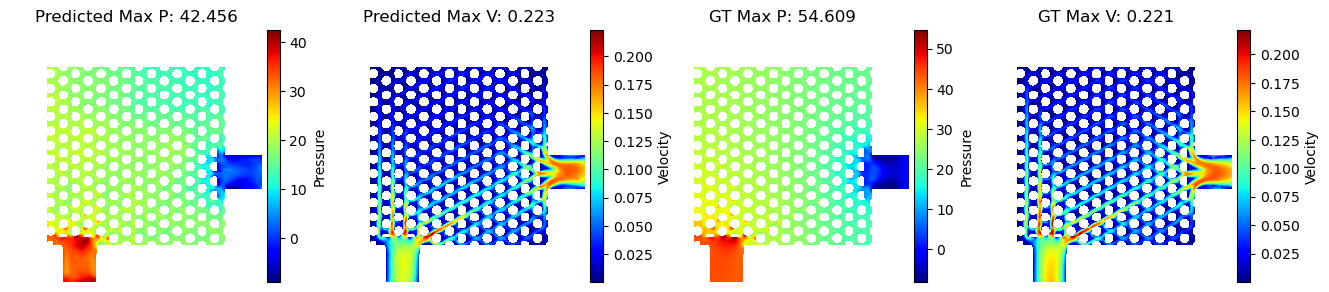

0
1000-bc_051_w_001_rn_001_inlet_top_outlet_right.npy


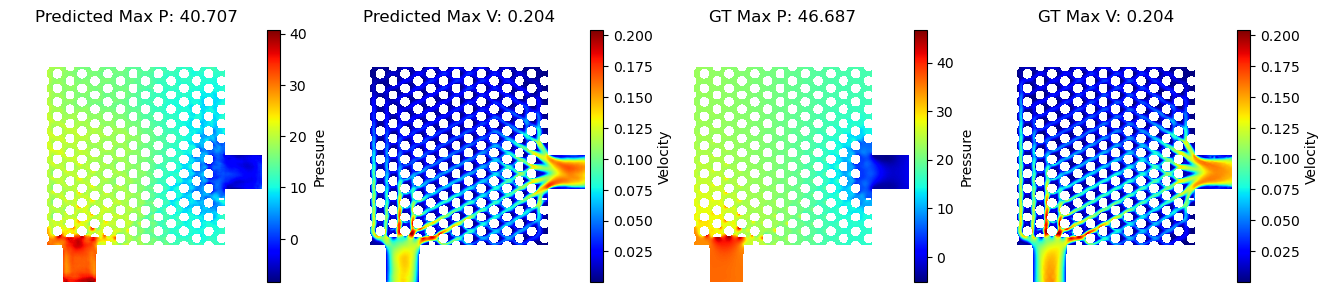

1
1000-bc_051_w_001_rn_002_inlet_top_outlet_right.npy


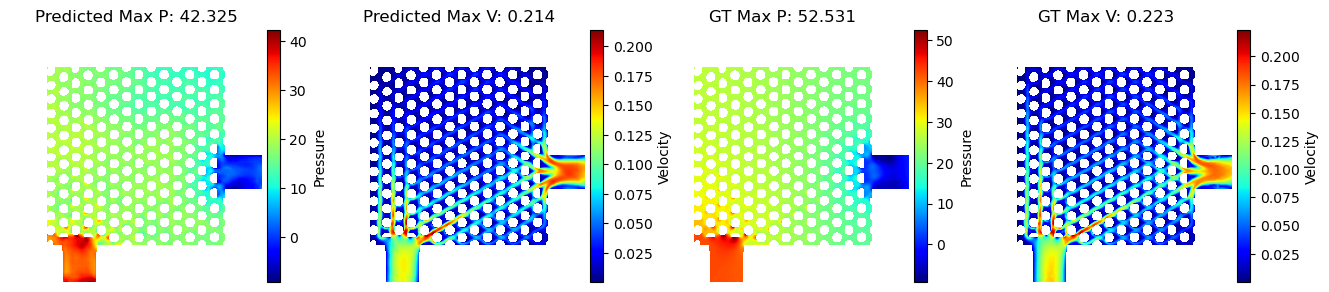

2
1000-bc_051_w_001_rn_003_inlet_top_outlet_right.npy


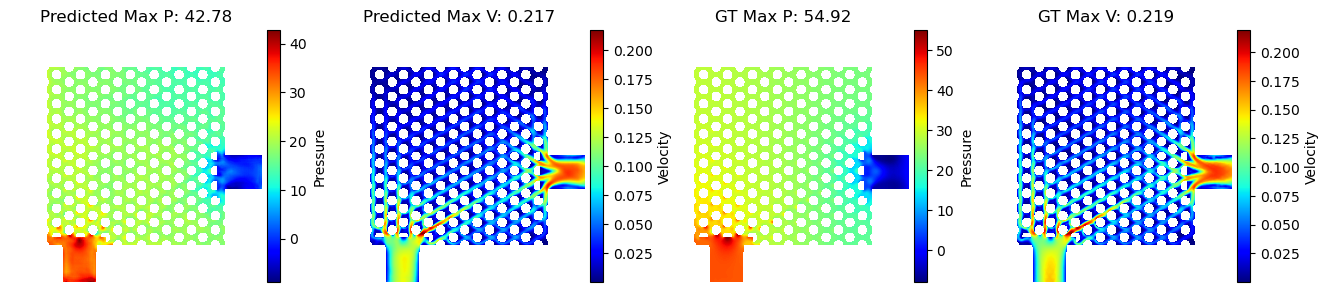

3
1000-bc_051_w_001_rn_004_inlet_top_outlet_right.npy


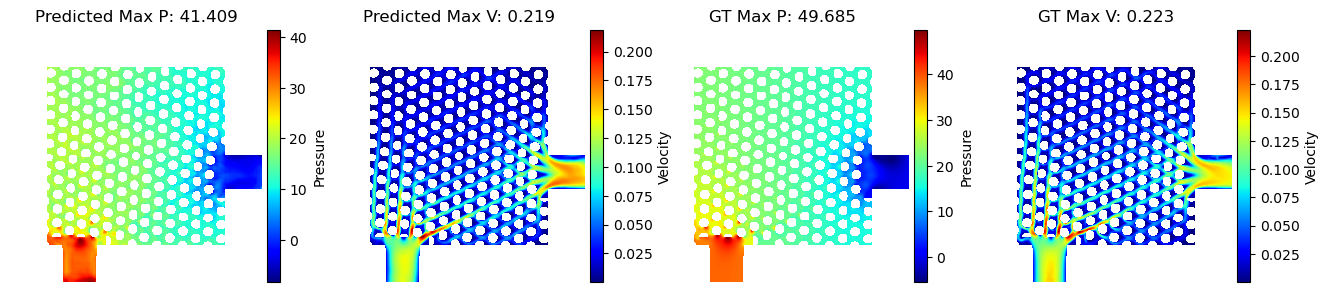

4
1000-bc_051_w_001_rn_005_inlet_top_outlet_right.npy


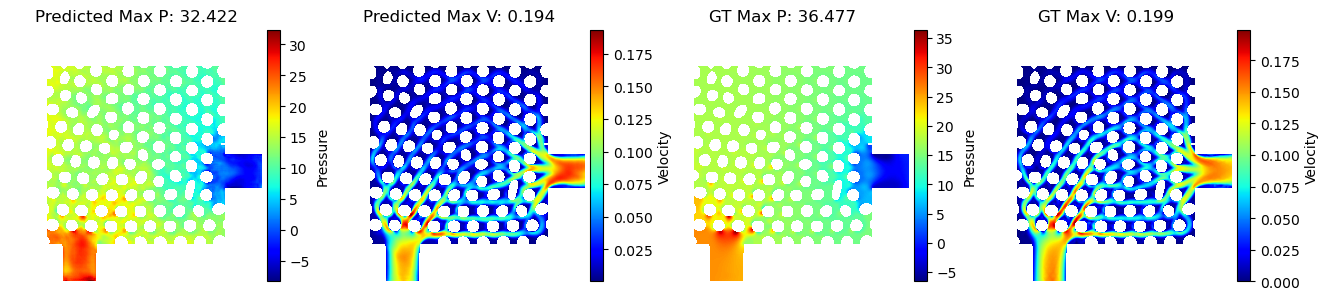

5
1000-bc_051_w_002_rn_001_inlet_top_outlet_right.npy


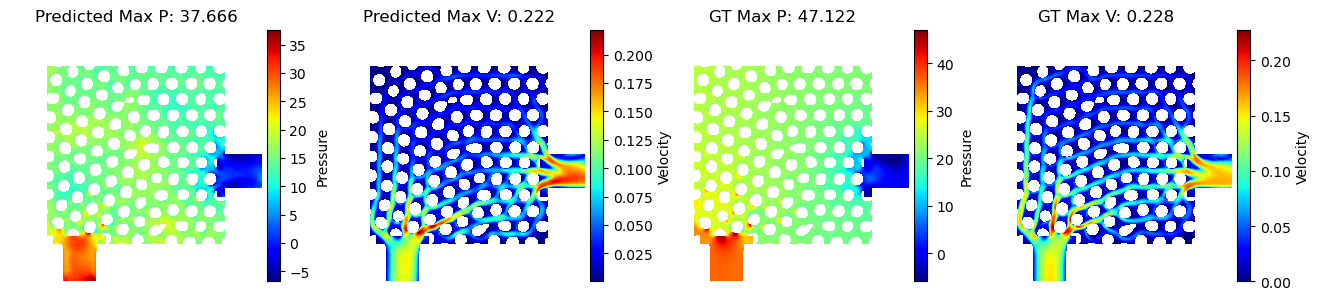

6
1000-bc_051_w_002_rn_002_inlet_top_outlet_right.npy


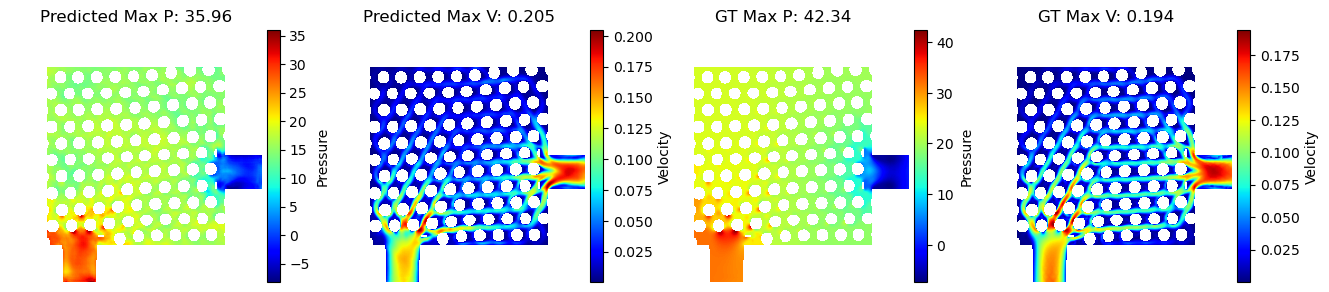

7
1000-bc_051_w_002_rn_003_inlet_top_outlet_right.npy


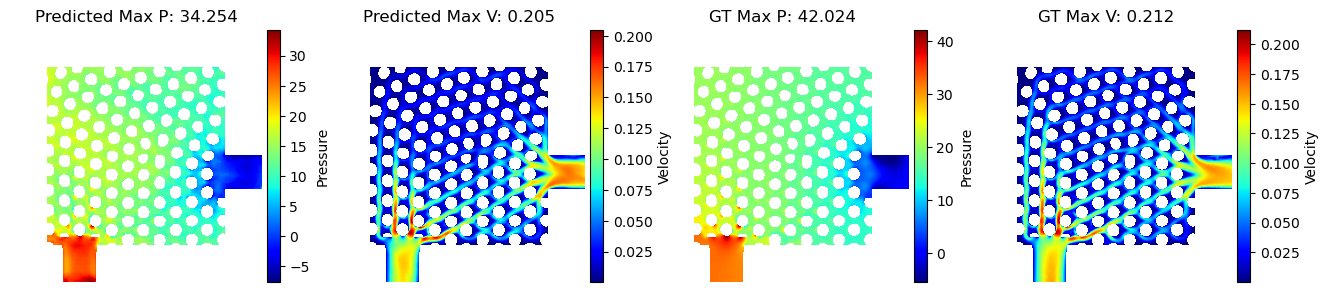

8
1000-bc_051_w_002_rn_004_inlet_top_outlet_right.npy


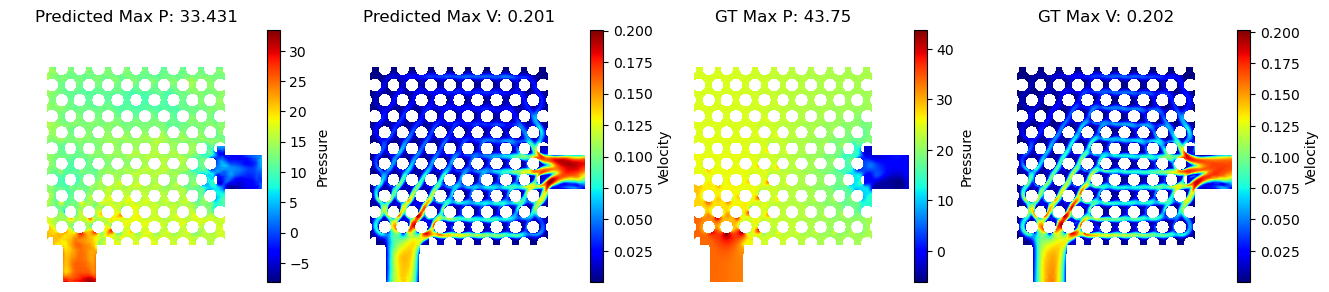

9
1000-bc_051_w_002_rn_005_inlet_top_outlet_right.npy


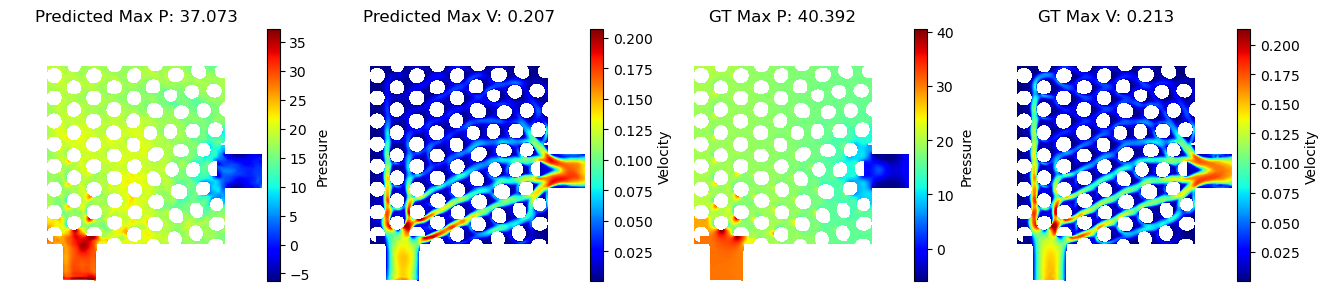

10
1000-bc_051_w_003_rn_001_inlet_top_outlet_right.npy


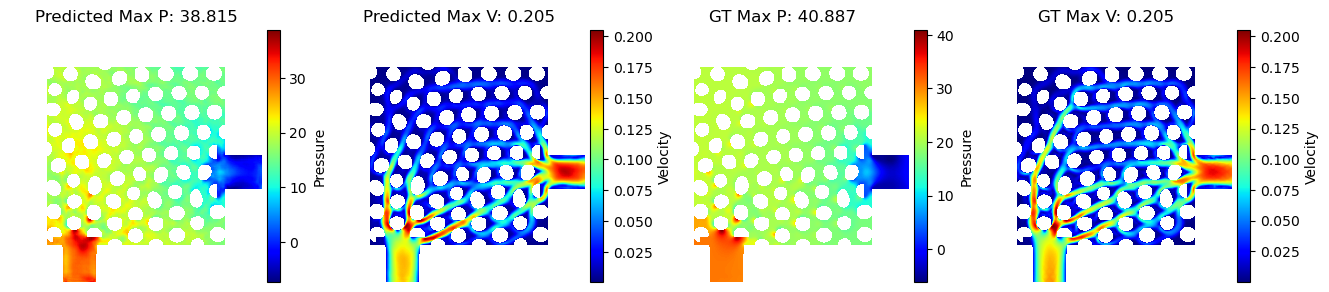

11
1000-bc_051_w_003_rn_002_inlet_top_outlet_right.npy


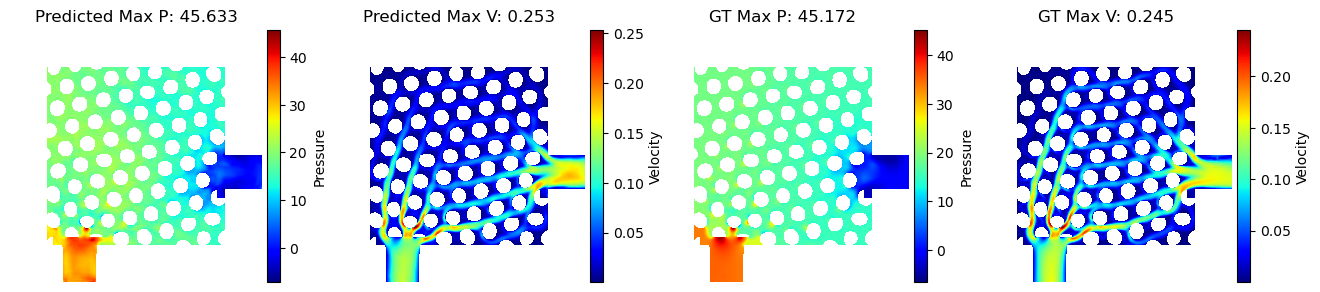

12
1000-bc_051_w_003_rn_003_inlet_top_outlet_right.npy


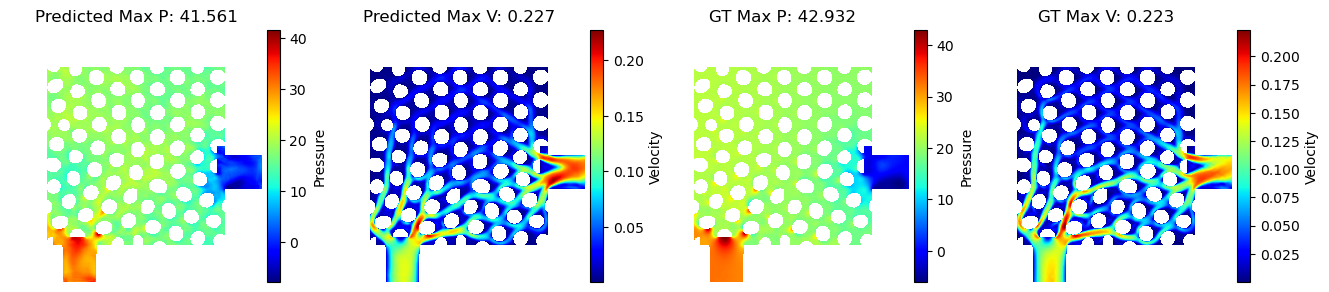

13
1000-bc_051_w_003_rn_004_inlet_top_outlet_right.npy


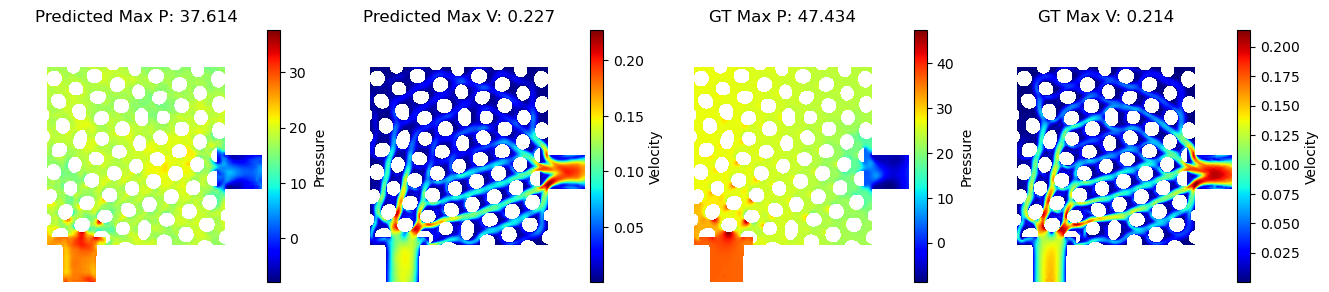

14
1000-bc_051_w_003_rn_005_inlet_top_outlet_right.npy


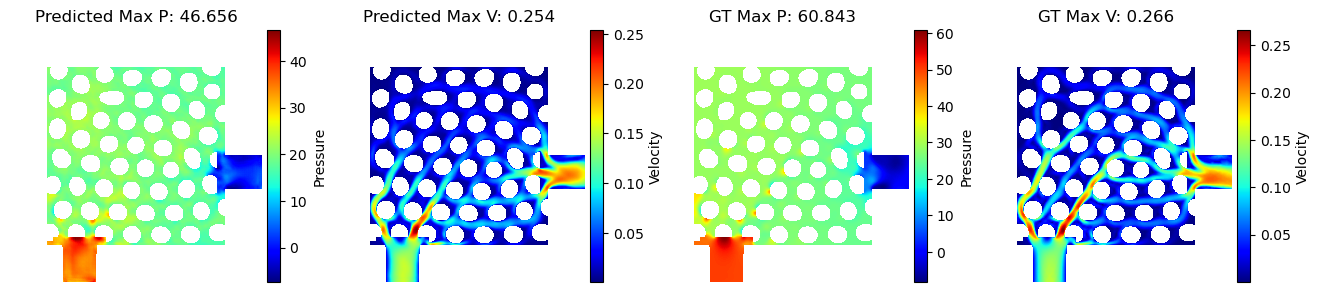

15
1000-bc_051_w_004_rn_001_inlet_top_outlet_right.npy


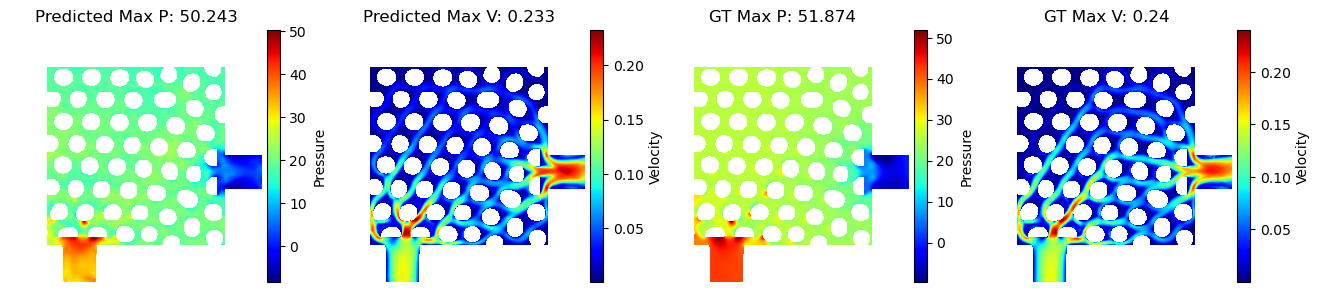

16
1000-bc_051_w_004_rn_002_inlet_top_outlet_right.npy


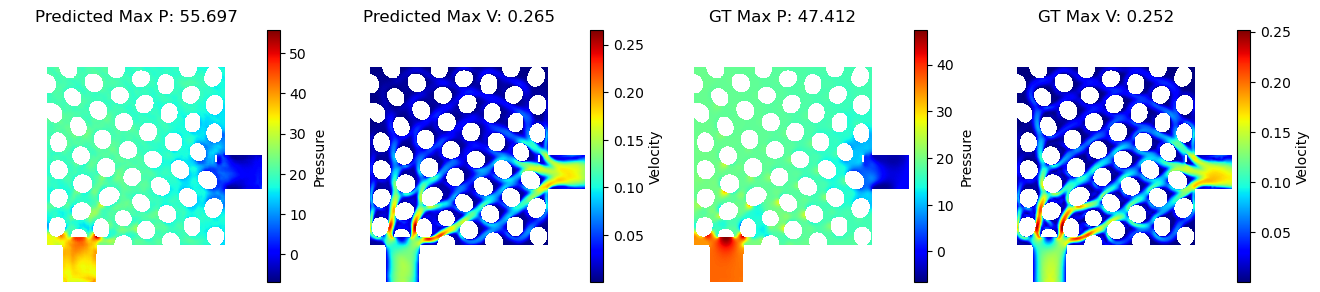

17
1000-bc_051_w_004_rn_003_inlet_top_outlet_right.npy


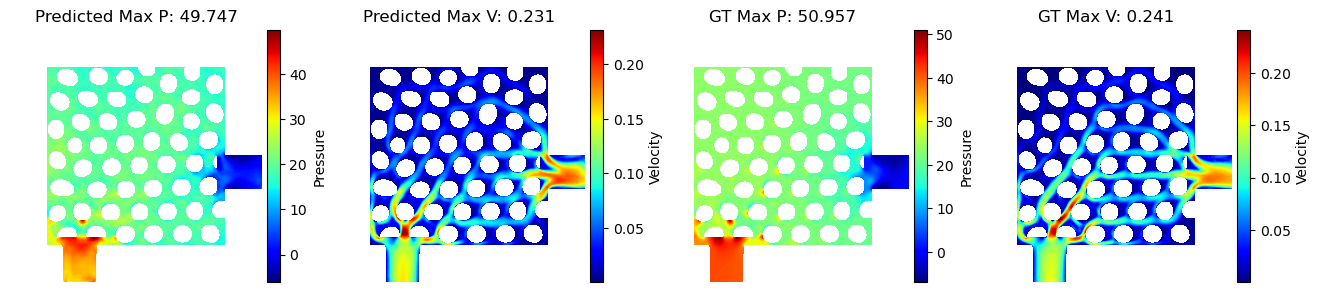

18
1000-bc_051_w_004_rn_004_inlet_top_outlet_right.npy


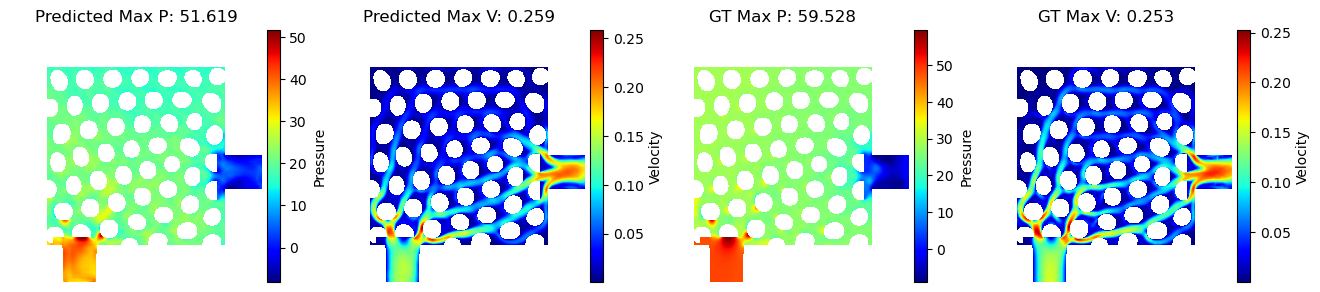

19
1000-bc_051_w_004_rn_005_inlet_top_outlet_right.npy


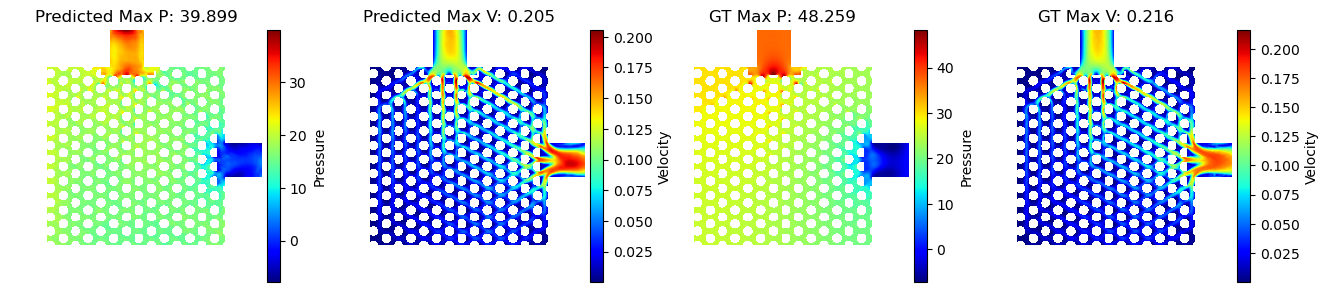

20
1000-bc_052_w_001_rn_001_inlet_bottom_outlet_right.npy


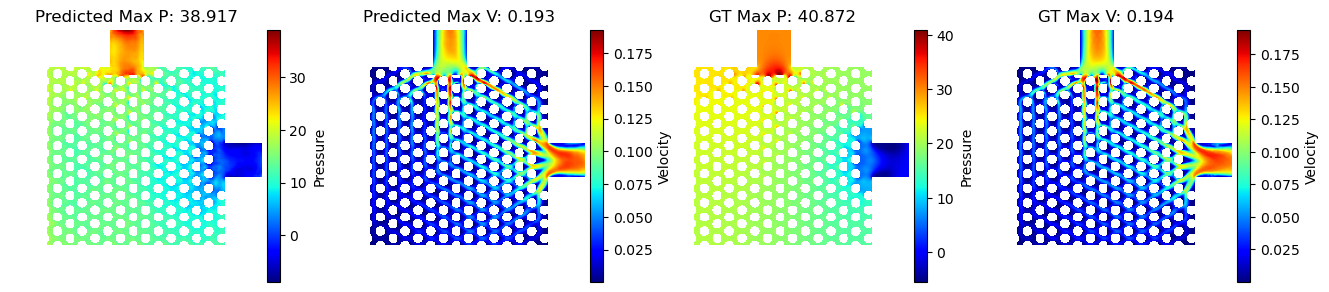

21
1000-bc_052_w_001_rn_002_inlet_bottom_outlet_right.npy


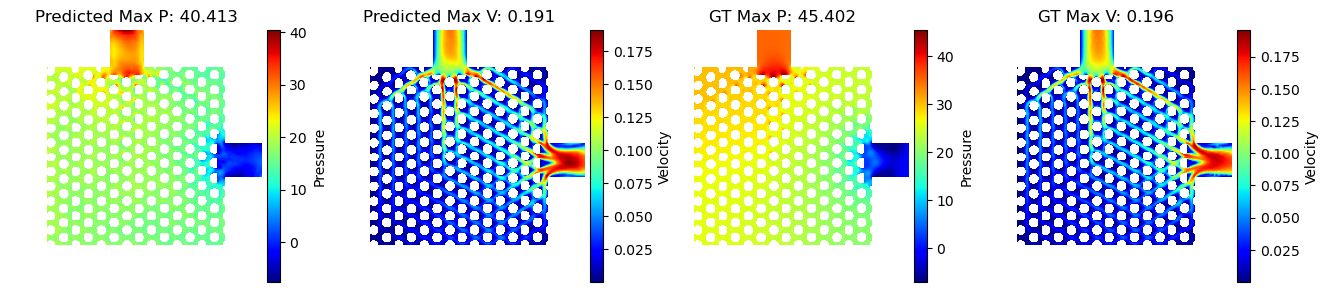

22
1000-bc_052_w_001_rn_003_inlet_bottom_outlet_right.npy


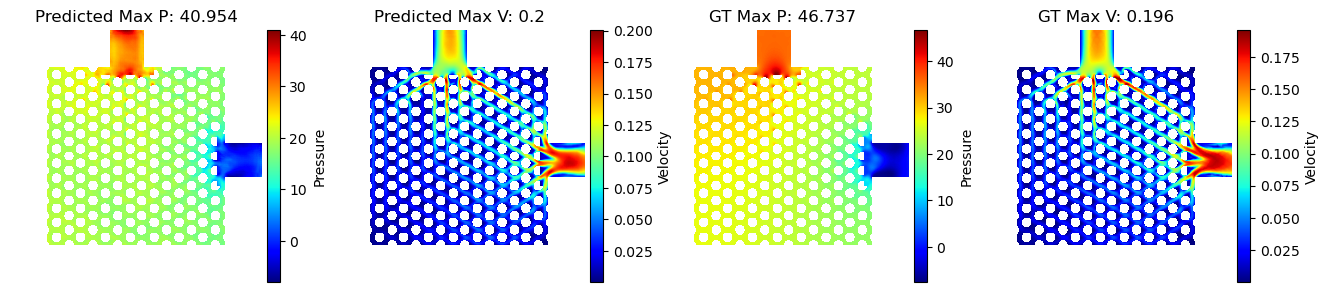

23
1000-bc_052_w_001_rn_004_inlet_bottom_outlet_right.npy


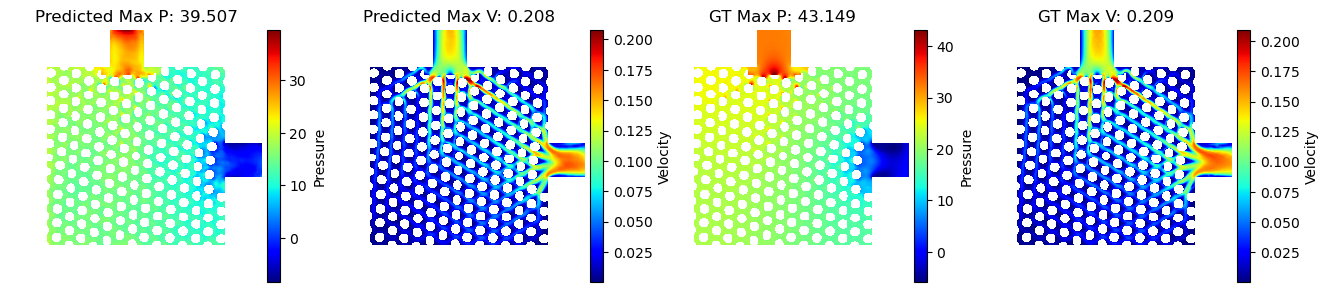

24
1000-bc_052_w_001_rn_005_inlet_bottom_outlet_right.npy


In [3]:
import matplotlib.pyplot as plt

lv2_folder = 'Validation/Low/LVV-new'
hv2_folder = 'Validation/High/HVV'
lp2_folder = 'Validation/Low/LPP-new'
hp2_folder = 'Validation/High/HPP'
lg2_folder = 'Validation/LG-3C'

# Get the list of file names in each folder
lv2_files = [f2 for f2 in os.listdir(lv2_folder) if f2 != ".ipynb_checkpoints"]
hv2_files = [f2 for f2 in os.listdir(hv2_folder) if f2 != ".ipynb_checkpoints"]
lp2_files = [f2 for f2 in os.listdir(lp2_folder) if f2 != ".ipynb_checkpoints"]
hp2_files = [f2 for f2 in os.listdir(hp2_folder) if f2 != ".ipynb_checkpoints"]
lg2_files = [f2 for f2 in os.listdir(lg2_folder) if f2 != ".ipynb_checkpoints"]

# Sort the file names to ensure the order is consistent
lv2_files.sort()
hv2_files.sort()
lp2_files.sort()
hp2_files.sort()
lg2_files.sort()



# Create empty lists to store the data
X_lv2 = []
X_lp2 = []
X_lg2 = []
Y_hv2 = []
Y_hp2 = []

# Read the data from the folders
for lv2_file, hv2_file,lp2_file,hp2_file,lg2_file in zip(lv2_files, hv2_files,lp2_files,hp2_files,lg2_files):
    try:
        
        # Read the LFV
        lv2_image = np.load(os.path.join(lv2_folder, lv2_file))  # Convert to RGB
        X_lv2.append(np.array(lv2_image))
        
        # Read the HFV
        hv2_image = np.load(os.path.join(hv2_folder, hv2_file))  # Convert to RGB
        Y_hv2.append(np.array(hv2_image))

        # Read the LFP
        lp2_image = np.load(os.path.join(lp2_folder, lp2_file))  # Convert to RGB
        X_lp2.append(np.array(lp2_image))
    
    
        # Read the channel geometry image
        lg2_image = Image.open(os.path.join(lg2_folder, lg2_file)).convert('RGB')  # Convert to RGB
        lg2_image = lg2_image.resize(input_shape[:2])  # Resize the image
        X_lg2.append(np.array(lg2_image))
    
        # Read the HFP
        hp2_image = np.load(os.path.join(hp2_folder, hp2_file))  # Convert to RGB
        Y_hp2.append(np.array(hp2_image))
    except:
        print('')

# Convert the lists to arrays
X_lv2 = np.array(X_lv2) 
X_lp2 = np.array(X_lp2) 
X_lg2 = np.array(X_lg2) / 255.0  # Normalize the channel geometry images
Y_hv2 = np.array(Y_hv2)
Y_hp2 = np.array(Y_hp2)





X_lp2 = np.nan_to_num(X_lp2, nan=0)
X_lv2 = np.nan_to_num(X_lv2, nan=0)
X_lp2=(X_lp2-np.min(X_lp2))/(np.max(X_lp2)-np.min(X_lp2))
# Predict velocity and pressure outputs
model.load_weights('Saved_Models_Temp/Final-micro-proposed-Unet-3-Inputs.h5')
pressure_output2,velocity_output2 = model.predict([X_lg2,X_lv2,X_lp2])

velocity_output2=(velocity_output2)
a=(np.max(Y_hp)-np.min(Y_hp))
b=(np.min(Y_hp))

pressure_output2=(pressure_output2*a)+b



mask = np.all(X_lg2 > 0.8, axis=-1)

# Expand mask to match the shape of array2
mask_expanded = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
Y_hp2[mask]=np.nan
Y_hv2[mask]=np.nan
velocity_output2[mask]=np.nan
pressure_output2[mask]=np.nan

from mpl_toolkits.axes_grid1 import make_axes_locatable





def plot_images(index):
    plt.figure(figsize=(16, 48))

    # Display the pressure output
    ax1 = plt.subplot(1, 4, 1)
    im1 = ax1.imshow(pressure_output2[index],cmap='jet')
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im1, cax=cax1, label='Pressure')
    ax1.set_title('Predicted Max P: '+ str(np.round(np.nanmax(pressure_output2[index]),decimals=3)))
    ax1.axis("off")

    # Display the velocity output
    ax2 = plt.subplot(1, 4, 2)
    im2 = ax2.imshow(velocity_output2[index],cmap='jet')
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im2, cax=cax2, label='Velocity')
    ax2.set_title('Predicted Max V: '+ str(np.round(np.nanmax(velocity_output2[index]),decimals=3)))
    ax2.axis("off")

    # Display the input image (Pressure GT)
    ax3 = plt.subplot(1, 4, 3)
    im3 = ax3.imshow(Y_hp2[index],cmap='jet')
    divider3 = make_axes_locatable(ax3)
    cax3 = divider3.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im3, cax=cax3, label='Pressure')
    ax3.set_title('GT Max P: '+ str(np.round(np.nanmax(Y_hp2[index]),decimals=3)))
    ax3.axis("off")

    # Display the velocity GT
    ax4 = plt.subplot(1, 4, 4)
    im4 = ax4.imshow(Y_hv2[index],cmap='jet')
    divider4 = make_axes_locatable(ax4)
    cax4 = divider4.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im4, cax=cax4, label='Velocity')
    ax4.set_title('GT Max V: '+ str(np.round(np.nanmax(Y_hv2[index]),decimals=3)))
    ax4.axis("off")

    plt.show()

# Loop to plot images 
for i in range(0, 25):
    plot_images(i)
    print(i)
    print(lv2_files[i])

In [6]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

Yp = np.expand_dims(Y_hp2, axis=-1)
Yv = np.expand_dims(Y_hv2, axis=-1)
# Dummy data (replace with actual predicted and expected arrays)
expected = Yp
predicted = pressure_output2

# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"Relative Error: {re:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")



MSE: 154.5218
MAE: 6.6889
RMSE: 12.4307
R^2: 0.7249
NRMSE: 0.0216
Relative Error: 1.7902
SMAPE: 49.8548%
Pearson Correlation: 0.8829
PSNR: 32.4191 dB


In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Dummy data (replace with actual predicted and expected arrays)
expected = Yv
predicted = velocity_output2

# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print(f"MSE: {mse:.8f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"Relative Error: {re:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")



MSE: 0.00028203
MAE: 0.0090
RMSE: 0.0168
R^2: 0.9065
NRMSE: 0.0184
Relative Error: 288032029.6058
SMAPE: 41.6841%
Pearson Correlation: 0.9522
PSNR: 34.6980 dB


In [8]:
path1="Results_Temp/Physics/Proposed"
os.makedirs(path1, exist_ok=True)
np.save(path1+"/velocity_predicted.npy",velocity_output2)
np.save(path1+"/pressure_predicted.npy",pressure_output2)
